___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [5]:
cols = [
     'MONTH',
     'DAY_OF_MONTH',
     'DAY_OF_WEEK',
     'OP_UNIQUE_CARRIER',
# For the time being, 'TAIL_NUM' will be disregarded due to its high cardinality  (~ 4500) and low expected added value    
#      'TAIL_NUM',
     'ORIGIN',
     'DEST',
#      'CRS_DEP_TIME', # Redundant having the 'DEP_ARR_hour' feature
     'DEP_TIME_hour',
#      'DEP_TIME',
#      'DEP_DELAY',
#      'DEP_DEL15',
#      'TAXI_OUT',
     'TAXI_OUT_median',
#      'TAXI_IN',
     'TAXI_IN_median',
#      'CRS_ARR_TIME', # Redundant having the 'ARR_ARR_hour' feature
     'ARR_TIME_hour', 
#      'ARR_TIME',   
#      'ARR_DELAY',
     'ARR_DEL15', # → Target !!
#      'CANCELLED',
     'CRS_ELAPSED_TIME',
     'DISTANCE',
     'DISTANCE_GROUP',
#      'CARRIER_DELAY',
#      'WEATHER_DELAY',
#      'NAS_DELAY',
#      'SECURITY_DELAY',
#      'LATE_AIRCRAFT_DELAY',
]

In [6]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT",
                                           "AL_OTP_MVP_Preprocessed_19_v2_clean.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\AL_OTP_MVP_Preprocessed_19_v2_clean.csv'

In [31]:
cols_dtypes = {
               'MONTH' : 'category',
               'DAY_OF_MONTH' : 'category',
               'DAY_OF_WEEK' : 'category',
               'OP_UNIQUE_CARRIER' : 'category',
               'ORIGIN' : 'category',
               'DEST' : 'category',
               'DEP_TIME_hour' : 'category',
               'TAXI_OUT_median' : 'int64',
               'TAXI_IN_median' : 'int64',
               'ARR_TIME_hour' : 'category', 
               'ARR_DEL15' : 'int32', # → Target !!
               'CRS_ELAPSED_TIME' : 'int64',
               'DISTANCE' : 'int64',
               'DISTANCE_GROUP' : 'category'
               }

In [32]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
                     usecols=cols,
                     low_memory = False)

Wall time: 19.1 s


In [33]:
# Cast types in accordance to previously defined dictionary:
df_all = df_all.astype(cols_dtypes)
# Display DF columns according to 'cols' order:
df_all = df_all[cols]
df_all

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,3,4,9E,TYS,ATL,11,15,8,12,1,70,152,1
1,1,4,5,9E,TYS,ATL,11,15,8,12,1,70,152,1
2,1,5,6,9E,ATL,SGF,9,17,5,10,0,121,563,3
3,1,6,7,9E,ATL,SGF,9,17,5,10,0,123,563,3
4,1,7,1,9E,ATL,SGF,9,17,5,10,0,123,563,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268227,12,31,2,B6,MCO,SWF,13,15,6,16,1,163,989,4
7268228,12,31,2,B6,DCA,BOS,14,15,6,15,0,90,399,2
7268229,12,31,2,B6,PHL,BOS,7,17,6,8,0,85,280,2
7268230,12,31,2,B6,BOS,SJU,8,16,5,13,0,242,1674,7


In [34]:
df_all.shape

(7268232, 14)

In [35]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268232 entries, 0 to 7268231
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   MONTH              category
 1   DAY_OF_MONTH       category
 2   DAY_OF_WEEK        category
 3   OP_UNIQUE_CARRIER  category
 4   ORIGIN             category
 5   DEST               category
 6   DEP_TIME_hour      category
 7   TAXI_OUT_median    int64   
 8   TAXI_IN_median     int64   
 9   ARR_TIME_hour      category
 10  ARR_DEL15          int32   
 11  CRS_ELAPSED_TIME   int64   
 12  DISTANCE           int64   
 13  DISTANCE_GROUP     category
dtypes: category(9), int32(1), int64(4)
memory usage: 325.8 MB


In [36]:
sample_length = int(1e4)
delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
df = delayed.append(ontime)

df_validation = df_all.loc[set(df_all.index) - set(df.index), :]

df.shape, df_validation.shape

((10000, 14), (7258232, 14))

### Feature analysis

[Dealing with categorical features with high cardinality: Target Encoding](https://medium.com/@kr.vishwesh54/dealing-with-categorical-features-with-high-cardinality-target-encoding-baa9298bf257)

In [37]:
X = df.drop('ARR_DEL15', axis=1)
X.sample(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
6982206,12,31,2,B6,BOS,JAX,10,16,5,13,185,1010,5
2524533,5,19,7,AA,ORD,PHL,13,17,7,16,135,678,3
5724820,10,17,4,WN,DEN,HOU,14,12,5,17,150,883,4
6848908,12,7,6,AA,ATL,CLT,7,17,9,8,81,226,1
3430065,6,29,6,OO,JAC,SLC,18,16,6,19,62,205,1


In [38]:
y = df['ARR_DEL15']
y.sample(5)

6708074    0
6691162    0
3842740    0
6916191    1
6223296    1
Name: ARR_DEL15, dtype: int32

In [39]:
def val_freq(col='', df=df):
    i = 0
    for v in df[col].value_counts().sort_index():
        print("{} : {} records ({:.2f}%)" \
              .format(df[col].value_counts().sort_index().index[i], v,  v / len(df) * 100))
        i += 1

In [40]:
%%time

for col in df.columns:
    print(col, ':', df[col].nunique(), 'unique values')
    if df[col].nunique() < 50:
        val_freq(col)
    print("")

MONTH : 12 unique values
1 : 749 records (7.49%)
2 : 757 records (7.57%)
3 : 787 records (7.87%)
4 : 792 records (7.92%)
5 : 923 records (9.23%)
6 : 954 records (9.54%)
7 : 911 records (9.11%)
8 : 911 records (9.11%)
9 : 765 records (7.65%)
10 : 798 records (7.98%)
11 : 761 records (7.61%)
12 : 892 records (8.92%)

DAY_OF_MONTH : 31 unique values
1 : 341 records (3.41%)
2 : 315 records (3.15%)
3 : 319 records (3.19%)
4 : 343 records (3.43%)
5 : 316 records (3.16%)
6 : 299 records (2.99%)
7 : 361 records (3.61%)
8 : 350 records (3.50%)
9 : 294 records (2.94%)
10 : 348 records (3.48%)
11 : 345 records (3.45%)
12 : 364 records (3.64%)
13 : 344 records (3.44%)
14 : 343 records (3.43%)
15 : 340 records (3.40%)
16 : 317 records (3.17%)
17 : 321 records (3.21%)
18 : 337 records (3.37%)
19 : 340 records (3.40%)
20 : 343 records (3.43%)
21 : 343 records (3.43%)
22 : 352 records (3.52%)
23 : 311 records (3.11%)
24 : 333 records (3.33%)
25 : 297 records (2.97%)
26 : 320 records (3.20%)
27 : 323 r

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


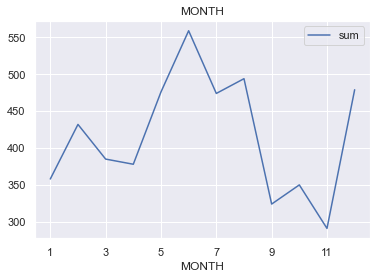

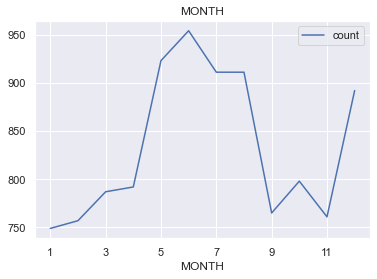

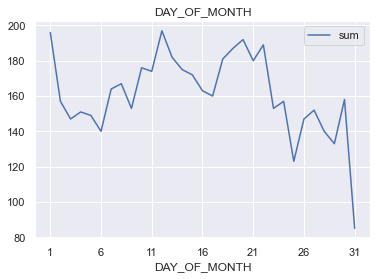

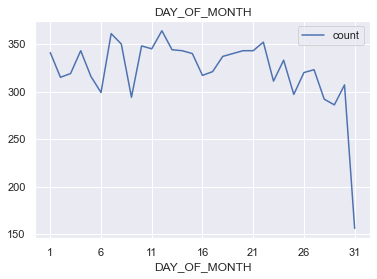

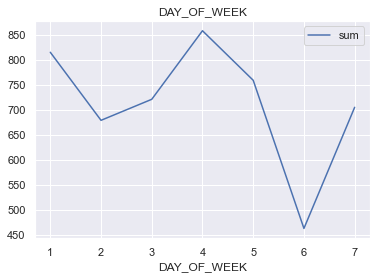

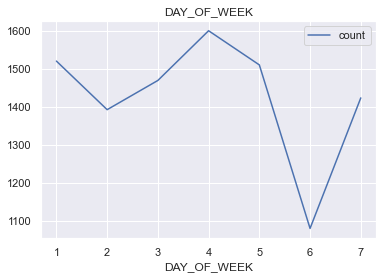

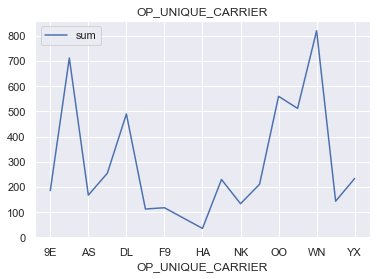

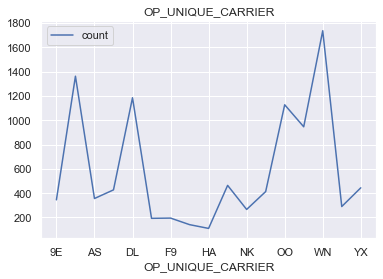

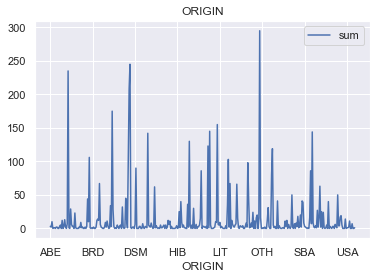

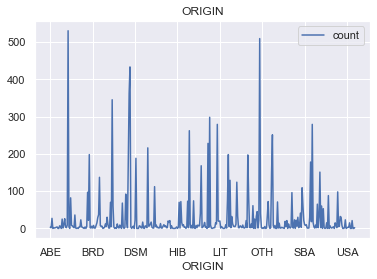

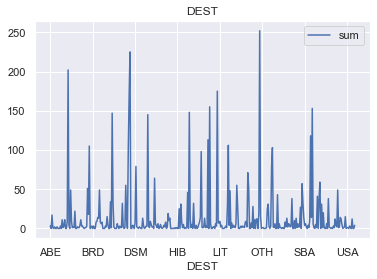

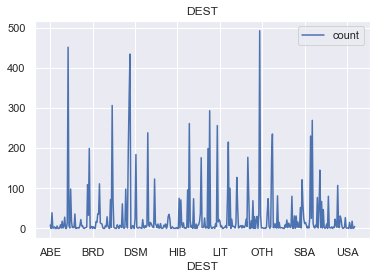

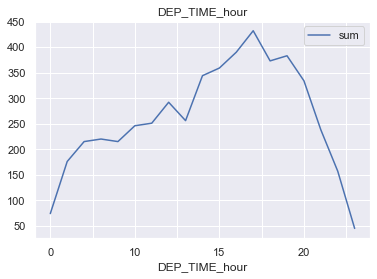

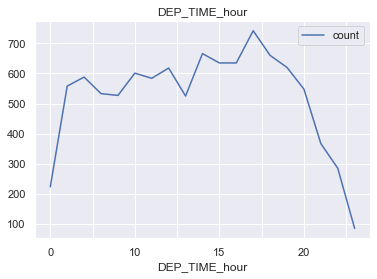

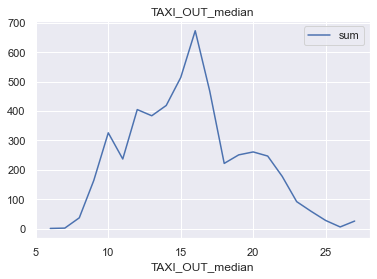

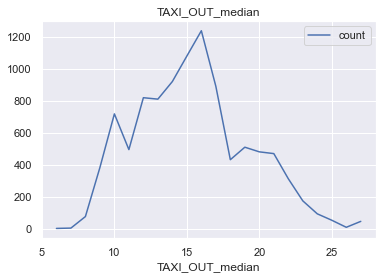

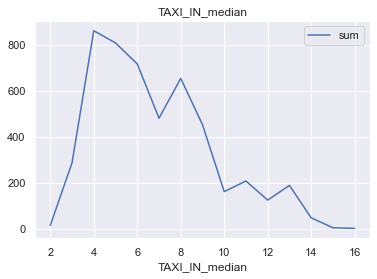

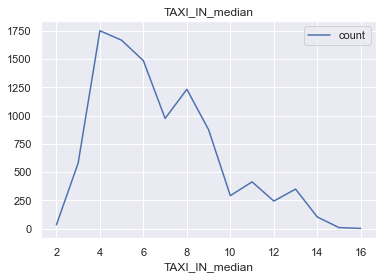

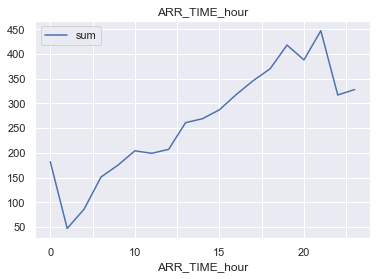

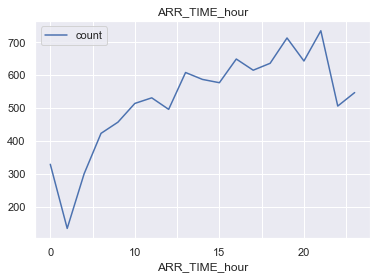

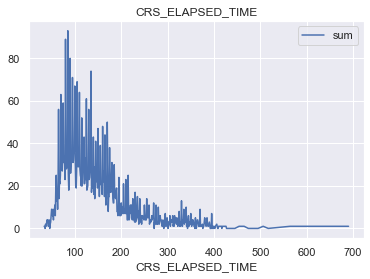

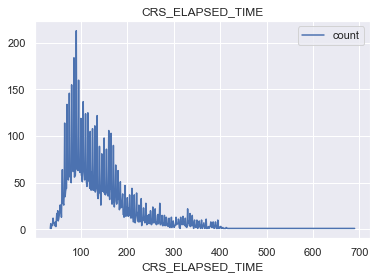

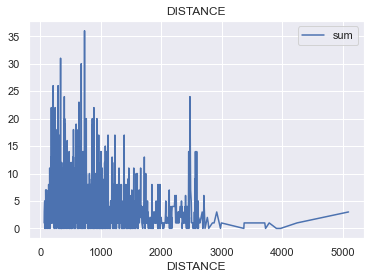

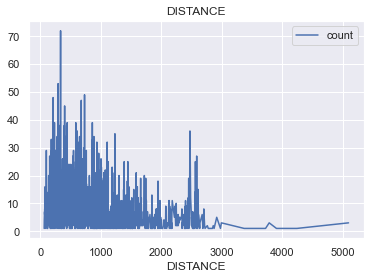

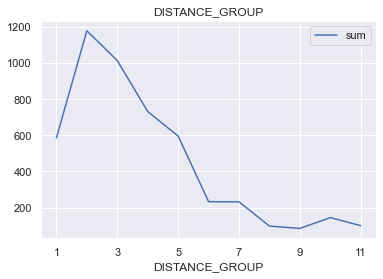

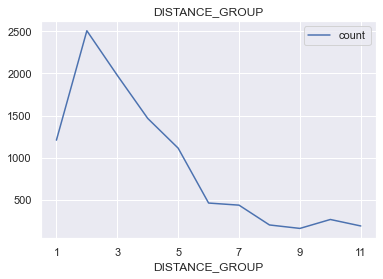

In [41]:
for col in X.columns:
    a = df.groupby([col], as_index=False).agg(['sum'])['ARR_DEL15']
    a.plot(legend=True)
    plt.title(col)
    b = df.groupby([col], as_index=False).agg(['count'])['ARR_DEL15']
    b.plot(legend=True)
    plt.title(col)

Conclusiones:
- En junio se concentra el mayor número de retrasos.
- Los D y X se concentra el mayor número de retrasos (especialmente X). D y X es cuando más vuelos hay con diferencia.

___

In [42]:
%memit

peak memory: 1245.14 MiB, increment: 0.39 MiB


### A Simple Guide to Scikit-learn Pipelines

#### Transformers

Before building the pipeline, let's split the data into a train and test set so that the performance of the model can be validated.

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

1. The first step in building the pipeline is to define each transformer type.

In [44]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Wall time: 210 ms


2. Next, let's use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this, the numeric and categorical columns shall be listed.

In [49]:
%%time

numeric_features = df.select_dtypes(include=['number']).drop(['ARR_DEL15'], axis=1).columns
categorical_features = df.select_dtypes(include=['category']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Wall time: 37 ms


#### Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case a simple RandomForestClassifier has been used to start with.

In [138]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
#                             confusion_matrix, plot_confusion_matrix

# predictions = clf.predict(X_test)
# probabilities = clf.predict_proba(X_test)

# print(fbeta_score(y_test, predictions, beta=2), f1_score(y_test, predictions), \
#       recall_score(y_test, predictions), precision_score(y_test, predictions), \
#       accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))

# tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
# plt.plot(tpr, fpr)
# plt.plot([0, 1], [0, 1], color='0.3', linestyle='dashed')
# plot_confusion_matrix(clf, X_test, y_test, display_labels=['on-time', 'delayed'])

Wall time: 5.78 s


0.595

#### Model selection

**A pipeline can also be used during the model selection process**. The following example code loops through a number of scikit-learn classifiers applying the transformations and training the model.

In [133]:
%%time

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
                            confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    LogisticRegression(solver='sag', max_iter=1000, random_state=0),
#     GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=0), # TARDA MUCHÍSIMO MÁS!!
#     SVC(kernel="linear", C=0.025, probability=True, random_state=0),
#     LinearSVC(C=0.025, kernel='linear', probability=True, dual=False, random_state=0),
# "The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples 
# and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or
# SGDClassifier instead."
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
    ]

# Define the result table as a DataFrame:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for classifier in classifiers:
    t0_clf = time.perf_counter() 
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    probabilities = pipe.predict_proba(X_test)
    
    # Print metrics:
    print(classifier)
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, predictions, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, predictions)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, predictions)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, predictions)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, predictions)))
    print(confusion_matrix(y_test, predictions))
    
    fpr, tpr, _ = roc_curve(y_test,  probabilities[::,1])
    auc = roc_auc_score(y_test, probabilities[::,1])
    result_table = result_table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)    
    t1_clf = time.perf_counter() - t0_clf
    print("time elapsed: {:6.1f} s\n".format(t1_clf))

LogisticRegression(max_iter=1000, random_state=0, solver='sag')
F-beta (ß=2) =  0.613
F1 =            0.607
Recall =        0.617
Precision =     0.597
Accuracy =      0.606
[[601 411]
 [378 610]]
time elapsed:    0.5 s

KNeighborsClassifier(n_neighbors=3)
F-beta (ß=2) =  0.542
F1 =            0.540
Recall =        0.544
Precision =     0.536
Accuracy =      0.542
[[548 464]
 [451 537]]
time elapsed:    1.5 s

SVC(C=0.025, probability=True, random_state=0)
F-beta (ß=2) =  0.690
F1 =            0.626
Recall =        0.741
Precision =     0.541
Accuracy =      0.562
[[392 620]
 [256 732]]
time elapsed:   38.1 s

DecisionTreeClassifier(random_state=0)
F-beta (ß=2) =  0.548
F1 =            0.548
Recall =        0.548
Precision =     0.549
Accuracy =      0.554
[[568 444]
 [447 541]]
time elapsed:    0.7 s

RandomForestClassifier(random_state=0)
F-beta (ß=2) =  0.578
F1 =            0.584
Recall =        0.575
Precision =     0.593
Accuracy =      0.595
[[622 390]
 [420 568]]
time elapsed: 

In [134]:
result_table

,classifiers,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0, 0.001976284584980237, 0.001976...","[0.0, 0.0010121457489878543, 0.002024291497975...",0.627496
1,KNeighborsClassifier,"[0.0, 0.10375494071146245, 0.45849802371541504...","[0.0, 0.1659919028340081, 0.5435222672064778, ...",0.558809
2,SVC,"[0.0, 0.0, 0.0, 0.001976284584980237, 0.001976...","[0.0, 0.0010121457489878543, 0.009109311740890...",0.585261
3,DecisionTreeClassifier,"[0.0, 0.43873517786561267, 1.0]","[0.0, 0.5475708502024291, 1.0]",0.554418
4,RandomForestClassifier,"[0.0, 0.0, 0.0009881422924901185, 0.0009881422...","[0.0, 0.0010121457489878543, 0.003036437246963...",0.629559
5,AdaBoostClassifier,"[0.0, 0.0009881422924901185, 0.000988142292490...","[0.0, 0.0, 0.0010121457489878543, 0.0010121457...",0.637303
6,GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0009881422924901185, 0.00098...","[0.0, 0.0010121457489878543, 0.008097165991902...",0.639101


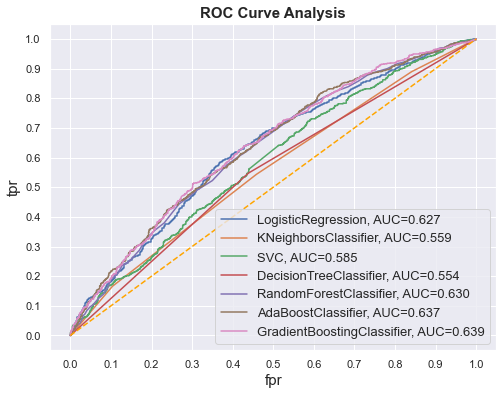

In [135]:
# Set the name of the classifiers as the index labels:
result_table.set_index('classifiers', inplace=True)

# Plot the figure:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("fpr", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("tpr", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

**The pipeline can also be used in grid search** to find the best performing parameters. To do this, let's first create a parameter grid for the chosen model.

*One important thing to note is that there is a need to append the name given to the classifier part of the pipeline to each parameter name. In the code above its name is ‘classifier’ so 'classifier__' has been added to each parameter.*

Next a grid search object has been created, which includes the original pipeline. When fit is called, the transformations are applied to the data, before a cross-validated grid-search is performed over the parameter grid.

In [20]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [139]:
%%time

# State the model:

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4, 5, 6, 7, 8],
    'classifier__criterion' :['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_rf = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_rf.fit(X_train, y_train)  
print(CV_rf.best_params_)    
print(CV_rf.best_score_)
CV_rf_scores = pd.DataFrame(CV_rf.cv_results_)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__n_estimators': 200}
0.6256917005149435
Wall time: 7min 48s


In [140]:
CV_rf_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,0.716556,0.028267,0.170494,0.022244,gini,4,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.646872,0.618888,0.631866,0.637393,0.612209,0.629445,0.012500,56,0.629305,0.625146,0.621637,0.630926,0.601987,0.621800,0.010425,15,0.591658,0.586245,0.574603,0.576883,0.567181,0.579314,0.008668,56,0.672070,0.669576,0.677057,0.696139,0.641345,0.671238,0.017612,9,0.603125,0.597500,0.586875,0.591250,0.574375,0.590625,0.009819,55
1,1.625993,0.115043,0.328597,0.052080,gini,4,auto,500,"{'classifier__criterion': 'gini', 'classifier_...",0.650462,0.619934,0.636306,0.641799,0.613456,0.632391,0.013741,33,0.640187,0.617698,0.617783,0.627542,0.601054,0.620853,0.012883,23,0.602198,0.576052,0.575269,0.588235,0.567478,0.581846,0.012151,51,0.683292,0.665835,0.667082,0.672478,0.638854,0.665508,0.014682,14,0.615000,0.586875,0.586250,0.599375,0.574375,0.592375,0.013803,46
2,0.692173,0.014723,0.150906,0.003575,gini,4,sqrt,200,"{'classifier__criterion': 'gini', 'classifier_...",0.646872,0.618888,0.631866,0.637393,0.612209,0.629445,0.012500,56,0.629305,0.625146,0.621637,0.630926,0.601987,0.621800,0.010425,15,0.591658,0.586245,0.574603,0.576883,0.567181,0.579314,0.008668,56,0.672070,0.669576,0.677057,0.696139,0.641345,0.671238,0.017612,9,0.603125,0.597500,0.586875,0.591250,0.574375,0.590625,0.009819,55
3,1.710943,0.343405,0.339315,0.065359,gini,4,sqrt,500,"{'classifier__criterion': 'gini', 'classifier_...",0.650462,0.619934,0.636306,0.641799,0.613456,0.632391,0.013741,33,0.640187,0.617698,0.617783,0.627542,0.601054,0.620853,0.012883,23,0.602198,0.576052,0.575269,0.588235,0.567478,0.581846,0.012151,51,0.683292,0.665835,0.667082,0.672478,0.638854,0.665508,0.014682,14,0.615000,0.586875,0.586250,0.599375,0.574375,0.592375,0.013803,46
4,0.739543,0.168403,0.158702,0.023847,gini,4,log2,200,"{'classifier__criterion': 'gini', 'classifier_...",0.647284,0.624468,0.631957,0.640195,0.610432,0.630867,0.012777,51,0.641531,0.631034,0.619670,0.631161,0.604191,0.625518,0.012710,3,0.599783,0.585288,0.569488,0.579002,0.567213,0.580155,0.011783,55,0.689526,0.684539,0.679551,0.693649,0.646326,0.678718,0.016873,2,0.613750,0.598750,0.581875,0.593125,0.575000,0.592500,0.013492,45
5,1.659578,0.213484,0.419930,0.069148,gini,4,log2,500,"{'classifier__criterion': 'gini', 'classifier_...",0.652895,0.624098,0.635729,0.641889,0.607646,0.632451,0.015510,32,0.640598,0.631518,0.612457,0.633102,0.608595,0.625254,0.012471,4,0.594450,0.589827,0.569742,0.591351,0.570185,0.583111,0.010839,46,0.694514,0.679551,0.662095,0.681196,0.652553,0.673982,0.014867,4,0.609375,0.602500,0.580000,0.603750,0.578750,0.594875,0.012872,31
6,0.959008,0.124284,0.156703,0.012050,gini,5,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.652184,0.619319,0.633484,0.641975,0.612495,0.631892,0.014493,37,0.642019,0.616197,0.621404,0.632361,0.596074,0.621611,0.015579,17,0.606430,0.582040,0.576923,0.584567,0.570615,0.584115,0.012136,38,0.682045,0.654613,0.673317,0.688667,0.623910,0.664511,0.023302,19,0.618750,0.591250,0.588750,0.598125,0.575625,0.594500,0.014150,32
7,1.744521,0.091328,0.320802,0.051520,gini,5,auto,500,"{'clas

In [142]:
%%time

# State the model:

from sklearn.ensemble import GradientBoostingClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(verbose=1, random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__loss': ['deviance', 'exponential'],
    'classifier__learning_rate': [.1, .2, .3, .4, .5],
    'classifier__n_estimators' : [100, 200, 300],
    'classifier__criterion' : ['friedman_mse', 'mse'],
    'classifier__max_depth' : [3, 4, 5, 6, 7]
}

from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_gb = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_gb.fit(X_train, y_train)  
print(CV_gb.best_params_)    
print(CV_gb.best_score_)
CV_gb_scores = pd.DataFrame(CV_gb.cv_results_)

### {'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
### 0.6073895589152426
### Wall time: 1h 27min 18s

      Iter       Train Loss   Remaining Time 
         1           1.3818            1.29s
         2           1.3781            1.27s
         3           1.3747            1.27s
         4           1.3715            1.28s
         5           1.3687            1.41s
         6           1.3662            1.44s
         7           1.3633            1.49s
         8           1.3611            1.51s
         9           1.3585            1.47s
        10           1.3560            1.42s
        20           1.3356            1.20s
        30           1.3203            0.99s
        40           1.3059            0.84s
        50           1.2940            0.69s
        60           1.2842            0.56s
        70           1.2755            0.41s
        80           1.2673            0.27s
        90           1.2616            0.14s
       100           1.2553            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3818            1.19s
        

       200           1.2067            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3816            2.19s
         2           1.3776            2.08s
         3           1.3741            2.03s
         4           1.3709            2.06s
         5           1.3679            2.26s
         6           1.3652            2.26s
         7           1.3625            2.26s
         8           1.3599            2.21s
         9           1.3573            2.18s
        10           1.3542            2.16s
        20           1.3326            1.94s
        30           1.3157            1.82s
        40           1.3011            1.72s
        50           1.2892            1.59s
        60           1.2798            1.48s
        70           1.2713            1.35s
        80           1.2628            1.25s
        90           1.2554            1.13s
       100           1.2481            1.02s
       200           1.1992            0.00s
      Ite

        20           1.3042            1.26s
        30           1.2767            1.10s
        40           1.2543            0.95s
        50           1.2342            0.77s
        60           1.2196            0.61s
        70           1.2063            0.45s
        80           1.1965            0.29s
        90           1.1874            0.15s
       100           1.1771            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3799            1.39s
         2           1.3746            1.40s
         3           1.3696            1.41s
         4           1.3653            1.36s
         5           1.3611            1.36s
         6           1.3565            1.40s
         7           1.3519            1.38s
         8           1.3476            1.36s
         9           1.3436            1.36s
        10           1.3401            1.34s
        20           1.3081            1.19s
        30           1.2821            1.02s
        4

        20           1.3118            4.16s
        30           1.2865            4.00s
        40           1.2685            3.80s
        50           1.2527            3.60s
        60           1.2393            3.40s
        70           1.2284            3.24s
        80           1.2209            3.05s
        90           1.2115            2.89s
       100           1.2036            2.73s
       200           1.1391            1.32s
       300           1.0909            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3793            4.48s
         2           1.3734            4.47s
         3           1.3676            4.55s
         4           1.3628            4.51s
         5           1.3584            4.48s
         6           1.3546            4.41s
         7           1.3503            4.48s
         8           1.3467            4.45s
         9           1.3425            4.46s
        10           1.3380            4.43s
        2

         3           1.3609            2.00s
         4           1.3546            1.97s
         5           1.3475            2.05s
         6           1.3421            2.00s
         7           1.3360            2.02s
         8           1.3304            1.99s
         9           1.3253            1.94s
        10           1.3196            1.94s
        20           1.2734            2.60s
        30           1.2347            2.03s
        40           1.2065            1.58s
        50           1.1885            1.24s
        60           1.1685            0.97s
        70           1.1520            0.70s
        80           1.1390            0.45s
        90           1.1261            0.22s
       100           1.1153            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3774            3.98s
         2           1.3696            4.25s
         3           1.3635            4.20s
         4           1.3577            4.02s
         

        80           1.1549            4.18s
        90           1.1428            3.93s
       100           1.1335            3.70s
       200           1.0602            1.79s
       300           1.0068            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3775            6.57s
         2           1.3697            7.15s
         3           1.3623            7.32s
         4           1.3552            6.48s
         5           1.3491            7.01s
         6           1.3434            6.59s
         7           1.3384            6.28s
         8           1.3328            6.62s
         9           1.3277            6.37s
        10           1.3224            6.74s
        20           1.2786            6.06s
        30           1.2446            5.50s
        40           1.2220            5.18s
        50           1.2027            5.00s
        60           1.1844            4.81s
        70           1.1671            4.51s
        8

        30           1.1893            5.65s
        40           1.1537            5.17s
        50           1.1284            4.93s
        60           1.1117            4.35s
        70           1.0946            4.08s
        80           1.0814            3.59s
        90           1.0697            3.16s
       100           1.0577            2.79s
       200           0.9661            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3748            5.57s
         2           1.3653            5.34s
         3           1.3566            5.25s
         4           1.3481            5.29s
         5           1.3396            5.50s
         6           1.3315            5.46s
         7           1.3224            5.62s
         8           1.3149            5.59s
         9           1.3083            5.49s
        10           1.3020            5.70s
        20           1.2391            5.55s
        30           1.1952            5.05s
        4

         2           1.3583            3.38s
         3           1.3459            3.50s
         4           1.3366            3.31s
         5           1.3268            3.23s
         6           1.3174            3.21s
         7           1.3084            3.24s
         8           1.2987            3.23s
         9           1.2909            3.19s
        10           1.2825            3.17s
        20           1.2127            2.86s
        30           1.1616            2.37s
        40           1.1327            1.89s
        50           1.1103            1.49s
        60           1.0921            1.15s
        70           1.0741            0.83s
        80           1.0595            0.54s
        90           1.0447            0.26s
       100           1.0317            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3713            3.26s
         2           1.3567            3.43s
         3           1.3443            3.39s
         

         2           1.3568            6.93s
         3           1.3427            7.37s
         4           1.3299            7.26s
         5           1.3189            7.22s
         6           1.3085            7.12s
         7           1.2994            7.01s
         8           1.2882            7.75s
         9           1.2793            7.89s
        10           1.2704            7.71s
        20           1.1941            6.90s
        30           1.1364            6.21s
        40           1.1040            5.43s
        50           1.0814            4.77s
        60           1.0609            4.26s
        70           1.0429            3.80s
        80           1.0296            3.38s
        90           1.0107            3.04s
       100           1.0004            2.70s
       200           0.8942            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3715           10.16s
         2           1.3583           10.27s
         

        40           0.9564            0.70s
        50           0.9500            0.57s
        60           0.9443            0.53s
        70           0.9391            0.47s
        80           0.9353            0.31s
        90           0.9314            0.18s
       100           0.9279            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9976            1.39s
         2           0.9956            1.47s
         3           0.9939            1.74s
         4           0.9922            1.58s
         5           0.9906            1.52s
         6           0.9893            1.50s
         7           0.9879            1.54s
         8           0.9865            1.51s
         9           0.9852            1.53s
        10           0.9838            1.52s
        20           0.9726            1.43s
        30           0.9644            1.22s
        40           0.9568            1.01s
        50           0.9503            0.81s
        6

        20           0.9706            3.76s
        30           0.9604            3.71s
        40           0.9523            3.60s
        50           0.9450            3.39s
        60           0.9381            3.13s
        70           0.9328            2.89s
        80           0.9280            2.69s
        90           0.9235            2.92s
       100           0.9195            2.88s
       200           0.8936            1.30s
       300           0.8761            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9978            4.48s
         2           0.9960            4.17s
         3           0.9942            5.54s
         4           0.9926            5.03s
         5           0.9910            5.13s
         6           0.9894            4.90s
         7           0.9879            4.89s
         8           0.9864            4.78s
         9           0.9853            4.72s
        10           0.9841            4.55s
        2

        20           0.9618            2.71s
        30           0.9488            2.53s
        40           0.9384            2.39s
        50           0.9293            2.22s
        60           0.9228            2.03s
        70           0.9172            1.86s
        80           0.9112            1.70s
        90           0.9054            1.55s
       100           0.9010            1.40s
       200           0.8649            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9965            3.01s
         2           0.9935            3.08s
         3           0.9905            3.03s
         4           0.9880            2.99s
         5           0.9858            2.97s
         6           0.9837            2.95s
         7           0.9815            3.09s
         8           0.9797            3.02s
         9           0.9775            3.01s
        10           0.9752            2.98s
        20           0.9580            2.76s
        3

      Iter       Train Loss   Remaining Time 
         1           0.9965            8.07s
         2           0.9934            8.19s
         3           0.9908            8.51s
         4           0.9882            8.80s
         5           0.9858            8.37s
         6           0.9835            8.62s
         7           0.9814            8.62s
         8           0.9792            9.37s
         9           0.9772            9.21s
        10           0.9752            9.19s
        20           0.9576           12.73s
        30           0.9431           13.27s
        40           0.9311           11.31s
        50           0.9214           10.11s
        60           0.9145            8.95s
        70           0.9084            7.83s
        80           0.9026            6.91s
        90           0.8972            6.19s
       100           0.8922            5.57s
       200           0.8558            2.01s
       300           0.8294            0.00s
      Ite

       100           0.8662            1.71s
       200           0.8222            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9956            3.98s
         2           0.9916            4.06s
         3           0.9878            4.07s
         4           0.9842            4.02s
         5           0.9809            3.93s
         6           0.9777            3.91s
         7           0.9752            3.85s
         8           0.9723            3.81s
         9           0.9694            3.86s
        10           0.9669            3.81s
        20           0.9440            3.53s
        30           0.9247            3.27s
        40           0.9123            2.99s
        50           0.9018            2.75s
        60           0.8919            2.53s
        70           0.8831            2.31s
        80           0.8773            2.10s
        90           0.8705            1.90s
       100           0.8642            1.71s
       20

        10           0.9532            2.51s
        20           0.9180            2.28s
        30           0.8913            1.97s
        40           0.8709            1.63s
        50           0.8550            1.32s
        60           0.8437            1.02s
        70           0.8342            0.74s
        80           0.8262            0.48s
        90           0.8193            0.23s
       100           0.8141            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9943            3.07s
         2           0.9894            2.74s
         3           0.9849            2.62s
         4           0.9804            2.57s
         5           0.9759            2.60s
         6           0.9716            2.57s
         7           0.9670            2.67s
         8           0.9633            2.60s
         9           0.9596            2.54s
        10           0.9554            2.51s
        20           0.9224            2.21s
        3

        20           0.9262            8.69s
        30           0.9050            7.75s
        40           0.8873            7.05s
        50           0.8753            6.43s
        60           0.8650            5.92s
        70           0.8566            5.50s
        80           0.8471            5.16s
        90           0.8394            4.82s
       100           0.8325            4.50s
       200           0.7703            2.02s
       300           0.7242            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9941            8.07s
         2           0.9884            7.89s
         3           0.9830            8.11s
         4           0.9778            8.14s
         5           0.9736            7.96s
         6           0.9696            7.88s
         7           0.9657            7.86s
         8           0.9619            7.81s
         9           0.9571            8.05s
        10           0.9532            8.00s
        2

         8           0.9494            3.43s
         9           0.9446            3.40s
        10           0.9390            3.35s
        20           0.8940            2.91s
        30           0.8635            2.40s
        40           0.8413            1.97s
        50           0.8270            1.56s
        60           0.8159            1.19s
        70           0.8044            0.87s
        80           0.7952            0.56s
        90           0.7844            0.28s
       100           0.7767            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9926            7.16s
         2           0.9858            6.93s
         3           0.9795            6.89s
         4           0.9745            6.61s
         5           0.9697            6.59s
         6           0.9652            6.49s
         7           0.9601            6.48s
         8           0.9551            6.57s
         9           0.9507            6.55s
        1

       300           0.6691            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9924           11.95s
         2           0.9856           11.11s
         3           0.9795           10.64s
         4           0.9736           10.47s
         5           0.9681           10.29s
         6           0.9629           10.17s
         7           0.9581            9.98s
         8           0.9527           10.38s
         9           0.9476           10.29s
        10           0.9424           10.42s
        20           0.9019           10.73s
        30           0.8740            9.83s
        40           0.8553            9.03s
        50           0.8395            8.41s
        60           0.8245            7.73s
        70           0.8118            7.17s
        80           0.8011            6.69s
        90           0.7922            6.27s
       100           0.7836            5.85s
       200           0.7140            2.55s
       30

        90           1.1919            1.12s
       100           1.1851            1.01s
       200           1.1255            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3780            2.19s
         2           1.3719            2.18s
         3           1.3659            2.23s
         4           1.3597            2.35s
         5           1.3543            2.26s
         6           1.3494            2.23s
         7           1.3449            2.23s
         8           1.3409            2.21s
         9           1.3372            2.21s
        10           1.3324            2.24s
        20           1.2997            2.01s
        30           1.2773            1.85s
        40           1.2598            1.70s
        50           1.2470            1.59s
        60           1.2374            1.45s
        70           1.2247            1.34s
        80           1.2162            1.23s
        90           1.2078            1.11s
       10

        20           1.2701            1.19s
        30           1.2404            0.99s
        40           1.2139            0.84s
        50           1.2006            0.68s
        60           1.1847            0.54s
        70           1.1678            0.40s
        80           1.1557            0.26s
        90           1.1429            0.13s
       100           1.1281            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3730            1.58s
         2           1.3628            1.52s
         3           1.3544            1.55s
         4           1.3469            1.58s
         5           1.3390            1.71s
         6           1.3306            1.91s
         7           1.3238            1.95s
         8           1.3166            1.93s
         9           1.3109            1.89s
        10           1.3045            1.83s
        20           1.2541            1.43s
        30           1.2224            1.15s
        4

        20           1.2539            2.70s
        30           1.2200            2.45s
        40           1.1954            2.26s
        50           1.1783            2.06s
        60           1.1629            1.90s
        70           1.1492            1.74s
        80           1.1364            1.59s
        90           1.1241            1.44s
       100           1.1086            1.31s
       200           1.0176            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3740            4.48s
         2           1.3649            4.32s
         3           1.3572            4.25s
         4           1.3495            4.59s
         5           1.3429            4.54s
         6           1.3354            4.46s
         7           1.3282            4.43s
         8           1.3220            4.38s
         9           1.3166            4.39s
        10           1.3112            4.35s
        20           1.2701            4.04s
        3

         3           1.3454            2.14s
         4           1.3335            2.16s
         5           1.3236            2.09s
         6           1.3142            2.03s
         7           1.3059            1.96s
         8           1.2980            1.92s
         9           1.2884            1.91s
        10           1.2805            1.94s
        20           1.2160            1.64s
        30           1.1787            1.35s
        40           1.1508            1.12s
        50           1.1343            0.90s
        60           1.1150            0.70s
        70           1.0925            0.52s
        80           1.0775            0.34s
        90           1.0621            0.17s
       100           1.0470            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3681            1.88s
         2           1.3543            1.86s
         3           1.3404            2.17s
         4           1.3282            2.11s
         

       100           1.0439            3.29s
       200           0.9254            1.59s
       300           0.8105            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3697            5.68s
         2           1.3561            6.11s
         3           1.3422            6.75s
         4           1.3310            6.60s
         5           1.3220            6.38s
         6           1.3113            6.42s
         7           1.3022            6.32s
         8           1.2950            6.21s
         9           1.2838            6.15s
        10           1.2762            6.06s
        20           1.2198            5.64s
        30           1.1844            5.20s
        40           1.1569            4.85s
        50           1.1389            4.47s
        60           1.1176            4.24s
        70           1.1030            3.98s
        80           1.0876            3.77s
        90           1.0738            3.57s
       10

        40           1.0999            3.79s
        50           1.0772            3.42s
        60           1.0511            3.11s
        70           1.0254            2.85s
        80           1.0001            2.59s
        90           0.9807            2.34s
       100           0.9615            2.09s
       200           0.8200            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3638            6.17s
         2           1.3435            7.82s
         3           1.3279            7.68s
         4           1.3140            7.10s
         5           1.2993            6.78s
         6           1.2857            6.43s
         7           1.2697            6.37s
         8           1.2562            6.38s
         9           1.2428            6.26s
        10           1.2294            6.14s
        20           1.1473            5.12s
        30           1.1022            4.47s
        40           1.0741            3.95s
        5

         2           1.3433            8.64s
         3           1.3274            8.31s
         4           1.3105            8.58s
         5           1.2945            8.49s
         6           1.2812            8.28s
         7           1.2684            8.07s
         8           1.2557            8.06s
         9           1.2450            7.95s
        10           1.2337            8.06s
        20           1.1551            7.25s
        30           1.1162            6.48s
        40           1.0765            6.00s
        50           1.0477            5.58s
        60           1.0336            5.14s
        70           1.0106            4.83s
        80           0.9912            4.52s
        90           0.9724            4.27s
       100           0.9573            4.01s
       200           0.8084            1.89s
       300           0.6797            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3583            3.46s
         

       200           0.7342            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3574            7.16s
         2           1.3349            6.93s
         3           1.3166            6.63s
         4           1.2939            6.95s
         5           1.2754            6.94s
         6           1.2570            6.82s
         7           1.2403            6.89s
         8           1.2250            6.82s
         9           1.2136            6.67s
        10           1.1999            6.61s
        20           1.1145            5.69s
        30           1.0678            5.12s
        40           1.0236            4.67s
        50           0.9945            4.21s
        60           0.9625            3.88s
        70           0.9394            3.53s
        80           0.9099            3.22s
        90           0.8849            2.93s
       100           0.8710            2.61s
       200           0.7027            0.00s
      Ite

        30           0.9393            0.72s
        40           0.9288            0.76s
        50           0.9200            0.61s
        60           0.9148            0.47s
        70           0.9077            0.35s
        80           0.9025            0.23s
        90           0.8991            0.11s
       100           0.8950            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9959            2.78s
         2           0.9928            1.91s
         3           0.9897            1.62s
         4           0.9865            1.49s
         5           0.9838            1.39s
         6           0.9813            1.32s
         7           0.9789            1.26s
         8           0.9769            1.21s
         9           0.9750            1.19s
        10           0.9726            1.18s
        20           0.9561            0.95s
        30           0.9437            0.79s
        40           0.9353            0.65s
        5

        30           0.9461            2.77s
        40           0.9379            2.62s
        50           0.9304            2.49s
        60           0.9242            2.37s
        70           0.9186            2.25s
        80           0.9135            2.15s
        90           0.9098            2.04s
       100           0.9056            1.93s
       200           0.8670            0.94s
       300           0.8397            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9954            3.29s
         2           0.9915            3.13s
         3           0.9885            3.17s
         4           0.9855            3.30s
         5           0.9829            3.28s
         6           0.9803            3.26s
         7           0.9780            3.25s
         8           0.9756            3.23s
         9           0.9731            3.19s
        10           0.9709            3.18s
        20           0.9525            2.92s
        3

         4           0.9788            1.49s
         5           0.9743            1.52s
         6           0.9706            1.47s
         7           0.9669            1.46s
         8           0.9633            1.43s
         9           0.9597            1.40s
        10           0.9566            1.39s
        20           0.9293            1.19s
        30           0.9132            1.00s
        40           0.9021            0.83s
        50           0.8911            0.68s
        60           0.8816            0.54s
        70           0.8742            0.40s
        80           0.8688            0.26s
        90           0.8611            0.13s
       100           0.8537            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9938            2.98s
         2           0.9892            3.07s
         3           0.9853            3.02s
         4           0.9813            2.94s
         5           0.9779            2.96s
         

        80           0.8751            2.82s
        90           0.8701            2.67s
       100           0.8645            2.53s
       200           0.8148            1.22s
       300           0.7702            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9938            4.18s
         2           0.9886            4.47s
         3           0.9841            4.39s
         4           0.9795            4.39s
         5           0.9760            4.33s
         6           0.9723            4.28s
         7           0.9683            4.41s
         8           0.9653            4.35s
         9           0.9626            4.28s
        10           0.9591            4.24s
        20           0.9354            4.02s
        30           0.9202            3.74s
        40           0.9070            3.54s
        50           0.8985            3.34s
        60           0.8879            3.17s
        70           0.8782            3.01s
        8

        40           0.8662            2.91s
        50           0.8570            2.63s
        60           0.8476            2.39s
        70           0.8375            2.18s
        80           0.8275            1.99s
        90           0.8201            1.80s
       100           0.8097            1.62s
       200           0.7380            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9917            3.98s
         2           0.9847            3.86s
         3           0.9776            4.40s
         4           0.9722            4.26s
         5           0.9669            4.13s
         6           0.9621            4.04s
         7           0.9560            4.16s
         8           0.9517            4.08s
         9           0.9475            4.03s
        10           0.9441            3.95s
        20           0.9093            3.52s
        30           0.8930            3.11s
        40           0.8805            2.83s
        5

         2           0.9799            2.60s
         3           0.9724            2.51s
         4           0.9651            2.46s
         5           0.9566            2.54s
         6           0.9498            2.53s
         7           0.9441            2.48s
         8           0.9363            2.47s
         9           0.9308            2.49s
        10           0.9257            2.45s
        20           0.8863            2.01s
        30           0.8654            1.63s
        40           0.8495            1.32s
        50           0.8340            1.07s
        60           0.8174            0.87s
        70           0.8039            0.65s
        80           0.7902            0.43s
        90           0.7812            0.21s
       100           0.7661            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9887            2.67s
         2           0.9783            2.74s
         3           0.9699            3.49s
         

         2           0.9781            5.74s
         3           0.9699            5.51s
         4           0.9611            5.68s
         5           0.9528            5.65s
         6           0.9462            5.46s
         7           0.9389            5.48s
         8           0.9325            5.37s
         9           0.9266            5.26s
        10           0.9208            5.28s
        20           0.8764            4.70s
        30           0.8521            4.11s
        40           0.8289            3.72s
        50           0.8174            3.32s
        60           0.8006            3.03s
        70           0.7861            2.76s
        80           0.7773            2.49s
        90           0.7679            2.25s
       100           0.7588            2.01s
       200           0.6596            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9887            7.77s
         2           0.9799            7.74s
         

        40           0.8035            1.64s
        50           0.7892            1.30s
        60           0.7742            1.01s
        70           0.7561            0.74s
        80           0.7457            0.48s
        90           0.7338            0.24s
       100           0.7194            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9855            3.36s
         2           0.9736            3.43s
         3           0.9641            3.37s
         4           0.9526            3.51s
         5           0.9424            3.46s
         6           0.9337            3.40s
         7           0.9248            3.32s
         8           0.9159            3.29s
         9           0.9095            3.20s
        10           0.9041            3.11s
        20           0.8519            2.57s
        30           0.8201            2.09s
        40           0.7979            1.68s
        50           0.7821            1.33s
        6

         8           0.9162           10.36s
         9           0.9086           10.37s
        10           0.8998           10.38s
        20           0.8388            9.37s
        30           0.8123            8.21s
        40           0.7868            7.46s
        50           0.7727            6.78s
        60           0.7612            6.22s
        70           0.7420            5.85s
        80           0.7274            5.50s
        90           0.7119            5.17s
       100           0.7035            4.83s
       200           0.5817            2.28s
       300           0.4790            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9860            9.86s
         2           0.9747            9.83s
         3           0.9649            9.60s
         4           0.9531            9.98s
         5           0.9431           10.20s
         6           0.9341           10.14s
         7           0.9265           10.00s
         

         5           1.3456            2.14s
         6           1.3390            2.13s
         7           1.3335            2.12s
         8           1.3284            2.11s
         9           1.3238            2.10s
        10           1.3190            2.11s
        20           1.2818            1.89s
        30           1.2617            1.72s
        40           1.2446            1.59s
        50           1.2246            1.49s
        60           1.2123            1.37s
        70           1.1994            1.26s
        80           1.1850            1.16s
        90           1.1692            1.07s
       100           1.1610            0.96s
       200           1.0798            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3732            2.19s
         2           1.3630            2.18s
         3           1.3545            2.23s
         4           1.3476            2.20s
         5           1.3405            2.14s
         

        90           1.1676            1.98s
       100           1.1568            1.88s
       200           1.0666            0.93s
       300           1.0009            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3734            4.67s
         2           1.3640            2.33s
         3           1.3545            3.09s
         4           1.3469            3.28s
         5           1.3402            3.54s
         6           1.3344            2.94s
         7           1.3286            3.16s
         8           1.3232            3.33s
         9           1.3174            3.45s
        10           1.3128            3.10s
        20           1.2719            3.06s
        30           1.2477            2.86s
        40           1.2299            2.68s
        50           1.2099            2.53s
        60           1.1990            2.39s
        70           1.1853            2.27s
        80           1.1762            2.15s
        9

        60           1.1421            1.79s
        70           1.1296            1.64s
        80           1.1143            1.54s
        90           1.0959            1.47s
       100           1.0767            1.34s
       200           0.9636            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3689            2.98s
         2           1.3557            2.97s
         3           1.3457            2.89s
         4           1.3348            2.94s
         5           1.3261            2.89s
         6           1.3167            2.84s
         7           1.3093            2.81s
         8           1.3015            2.78s
         9           1.2938            2.76s
        10           1.2853            2.77s
        20           1.2373            2.47s
        30           1.2081            2.27s
        40           1.1829            2.09s
        50           1.1587            1.94s
        60           1.1386            1.79s
        7

        20           1.1644            1.52s
        30           1.1203            1.26s
        40           1.0926            1.03s
        50           1.0728            0.83s
        60           1.0495            0.65s
        70           1.0332            0.48s
        80           1.0089            0.32s
        90           0.9860            0.16s
       100           0.9687            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3627            1.88s
         2           1.3446            1.86s
         3           1.3252            2.10s
         4           1.3106            2.06s
         5           1.2963            2.01s
         6           1.2841            1.99s
         7           1.2728            2.01s
         8           1.2602            1.96s
         9           1.2492            1.91s
        10           1.2390            1.86s
        20           1.1801            1.48s
        30           1.1426            1.23s
        4

        20           1.1809            5.22s
        30           1.1390            4.80s
        40           1.1066            4.48s
        50           1.0716            4.21s
        60           1.0521            3.94s
        70           1.0282            3.71s
        80           1.0070            3.51s
        90           0.9883            3.31s
       100           0.9723            3.14s
       200           0.7919            1.54s
       300           0.6640            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3612            5.98s
         2           1.3409            6.10s
         3           1.3218            6.66s
         4           1.3087            6.38s
         5           1.2953            6.21s
         6           1.2830            6.09s
         7           1.2689            5.99s
         8           1.2572            6.07s
         9           1.2453            5.99s
        10           1.2341            5.92s
        2

         8           1.2090            2.49s
         9           1.1932            2.47s
        10           1.1776            2.46s
        20           1.1049            1.93s
        30           1.0631            1.56s
        40           1.0322            1.28s
        50           1.0094            1.02s
        60           0.9771            0.80s
        70           0.9389            0.60s
        80           0.9034            0.40s
        90           0.8828            0.19s
       100           0.8681            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3543            5.17s
         2           1.3315            4.95s
         3           1.3109            4.92s
         4           1.2879            5.24s
         5           1.2677            5.26s
         6           1.2497            5.23s
         7           1.2356            5.18s
         8           1.2235            5.13s
         9           1.2095            5.05s
        1

       300           0.5300            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3555            8.07s
         2           1.3334            7.66s
         3           1.3135            7.66s
         4           1.2911            8.10s
         5           1.2728            7.93s
         6           1.2540            7.86s
         7           1.2397            7.80s
         8           1.2243            7.75s
         9           1.2111            7.74s
        10           1.2041            7.55s
        20           1.1184            6.72s
        30           1.0733            5.99s
        40           1.0357            5.54s
        50           1.0055            5.16s
        60           0.9725            4.89s
        70           0.9501            4.58s
        80           0.9167            4.35s
        90           0.8867            4.12s
       100           0.8595            3.90s
       200           0.6682            1.88s
       30

        60           0.8933            3.37s
        70           0.8516            3.10s
        80           0.8318            2.80s
        90           0.7987            2.56s
       100           0.7744            2.30s
       200           0.5470            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3468            6.36s
         2           1.3148            7.02s
         3           1.2846            7.06s
         4           1.2627            6.84s
         5           1.2430            6.58s
         6           1.2240            6.49s
         7           1.2018            6.53s
         8           1.1808            6.57s
         9           1.1647            6.48s
        10           1.1533            6.32s
        20           1.0820            5.07s
        30           1.0289            4.72s
        40           0.9806            4.25s
        50           0.9457            3.82s
        60           0.9100            3.47s
        7

        30           0.9337            0.72s
        40           0.9256            0.60s
        50           0.9172            0.49s
        60           0.9108            0.39s
        70           0.9039            0.29s
        80           0.8961            0.19s
        90           0.8918            0.10s
       100           0.8860            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9935            1.09s
         2           0.9882            1.03s
         3           0.9839            1.07s
         4           0.9803            1.03s
         5           0.9768            1.01s
         6           0.9734            1.00s
         7           0.9702            1.00s
         8           0.9672            0.98s
         9           0.9643            0.97s
        10           0.9620            0.94s
        20           0.9389            0.86s
        30           0.9233            0.73s
        40           0.9133            0.61s
        5

        30           0.9265            1.74s
        40           0.9167            1.60s
        50           0.9089            1.48s
        60           0.9023            1.37s
        70           0.8958            1.26s
        80           0.8889            1.16s
        90           0.8827            1.06s
       100           0.8777            0.96s
       200           0.8339            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9940            3.29s
         2           0.9899            3.13s
         3           0.9865            3.17s
         4           0.9829            3.18s
         5           0.9799            3.18s
         6           0.9766            3.23s
         7           0.9735            3.22s
         8           0.9703            3.25s
         9           0.9679            3.23s
        10           0.9654            3.22s
        20           0.9463            2.98s
        30           0.9337            2.79s
        4

         4           0.9738            1.62s
         5           0.9693            1.70s
         6           0.9644            1.76s
         7           0.9604            1.74s
         8           0.9563            1.69s
         9           0.9513            1.65s
        10           0.9477            1.60s
        20           0.9213            1.25s
        30           0.9032            1.03s
        40           0.8884            0.85s
        50           0.8779            0.68s
        60           0.8660            0.54s
        70           0.8549            0.39s
        80           0.8479            0.26s
        90           0.8356            0.13s
       100           0.8276            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9907            1.39s
         2           0.9838            1.52s
         3           0.9771            1.55s
         4           0.9716            1.54s
         5           0.9662            1.52s
         

       100           0.8237            2.49s
       200           0.7486            1.21s
       300           0.6875            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9914            4.48s
         2           0.9850            4.47s
         3           0.9783            4.65s
         4           0.9734            4.59s
         5           0.9689            4.48s
         6           0.9639            4.46s
         7           0.9595            4.48s
         8           0.9553            4.49s
         9           0.9520            4.43s
        10           0.9469            4.38s
        20           0.9196            3.96s
        30           0.9031            3.71s
        40           0.8904            3.47s
        50           0.8783            3.28s
        60           0.8710            3.09s
        70           0.8613            2.93s
        80           0.8540            2.77s
        90           0.8473            2.62s
       10

        40           0.8519            2.77s
        50           0.8396            2.51s
        60           0.8286            2.30s
        70           0.8111            2.12s
        80           0.8018            1.93s
        90           0.7907            1.76s
       100           0.7776            1.59s
       200           0.6761            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9874            3.98s
         2           0.9768            4.16s
         3           0.9669            4.32s
         4           0.9600            4.20s
         5           0.9530            4.08s
         6           0.9464            4.00s
         7           0.9394            3.93s
         8           0.9336            3.98s
         9           0.9273            3.98s
        10           0.9218            3.93s
        20           0.8819            3.44s
        30           0.8637            3.03s
        40           0.8432            2.77s
        5

         2           0.9777            6.40s
         3           0.9687            6.34s
         4           0.9606            6.29s
         5           0.9529            6.25s
         6           0.9466            6.12s
         7           0.9403            6.03s
         8           0.9348            5.91s
         9           0.9302            5.79s
        10           0.9239            5.83s
        20           0.8865            5.25s
        30           0.8652            4.75s
        40           0.8448            4.46s
        50           0.8337            4.14s
        60           0.8205            3.90s
        70           0.8071            3.70s
        80           0.8001            3.48s
        90           0.7878            3.30s
       100           0.7802            3.13s
       200           0.6700            1.55s
       300           0.5762            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9839            3.67s
         

       200           0.6110            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9845            5.37s
         2           0.9730            5.14s
         3           0.9622            5.12s
         4           0.9511            5.44s
         5           0.9417            5.30s
         6           0.9317            5.23s
         7           0.9270            5.04s
         8           0.9190            5.01s
         9           0.9122            4.94s
        10           0.9019            5.01s
        20           0.8533            4.52s
        30           0.8248            3.95s
        40           0.8005            3.56s
        50           0.7823            3.22s
        60           0.7667            2.92s
        70           0.7517            2.66s
        80           0.7354            2.44s
        90           0.7243            2.19s
       100           0.7150            1.96s
       200           0.5807            0.00s
      Ite

        20           0.8000            2.55s
        30           0.7767            1.98s
        40           0.7583            1.58s
        50           0.7348            1.27s
        60           0.7141            0.99s
        70           0.6906            0.73s
        80           0.6716            0.48s
        90           0.6473            0.24s
       100           0.6381            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9801            3.17s
         2           0.9634            3.33s
         3           0.9472            3.36s
         4           0.9331            3.31s
         5           0.9222            3.21s
         6           0.9125            3.13s
         7           0.9025            3.13s
         8           0.8920            3.09s
         9           0.8839            3.02s
        10           0.8756            2.95s
        20           0.8326            2.27s
        30           0.8050            1.84s
        4

         8           0.8862           10.55s
         9           0.8789           10.28s
        10           0.8705           10.18s
        20           0.8325            9.48s
        30           0.7924            8.93s
        40           0.7675            8.07s
        50           0.7465            7.31s
        60           0.7203            6.94s
        70           0.7048            6.40s
        80           0.6810            5.98s
        90           0.6611            5.75s
       100           0.6482            5.37s
       200           0.5045            2.40s
       300           0.3737            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9799           10.46s
         2           0.9637           10.27s
         3           0.9492           10.09s
         4           0.9340           10.13s
         5           0.9216           10.38s
         6           0.9079           10.28s
         7           0.8976           10.29s
         

      Iter       Train Loss   Remaining Time 
         1           1.3701            1.09s
         2           1.3575            1.08s
         3           1.3467            1.10s
         4           1.3375            1.06s
         5           1.3295            1.04s
         6           1.3221            1.03s
         7           1.3160            1.01s
         8           1.3101            1.00s
         9           1.3044            0.98s
        10           1.2979            0.97s
        20           1.2580            0.82s
        30           1.2333            0.70s
        40           1.2104            0.59s
        50           1.1963            0.49s
        60           1.1770            0.39s
        70           1.1648            0.29s
        80           1.1551            0.19s
        90           1.1454            0.09s
       100           1.1352            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3711            2.19s
        

        60           1.1836            2.34s
        70           1.1737            2.21s
        80           1.1599            2.10s
        90           1.1452            2.00s
       100           1.1332            1.90s
       200           1.0287            0.94s
       300           0.9403            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3704            3.29s
         2           1.3598            3.28s
         3           1.3506            3.27s
         4           1.3422            3.18s
         5           1.3338            3.18s
         6           1.3255            3.18s
         7           1.3190            3.14s
         8           1.3136            3.28s
         9           1.3070            3.26s
        10           1.3005            3.26s
        20           1.2608            2.99s
        30           1.2312            2.81s
        40           1.2073            2.63s
        50           1.1872            2.49s
        6

        20           1.1965            2.57s
        30           1.1690            2.30s
        40           1.1447            2.09s
        50           1.1213            1.93s
        60           1.0935            1.78s
        70           1.0742            1.64s
        80           1.0605            1.50s
        90           1.0371            1.37s
       100           1.0193            1.24s
       200           0.8468            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3648            2.78s
         2           1.3491            2.77s
         3           1.3329            2.95s
         4           1.3216            2.92s
         5           1.3088            2.91s
         6           1.2990            2.86s
         7           1.2881            2.88s
         8           1.2776            2.87s
         9           1.2680            2.83s
        10           1.2616            2.78s
        20           1.2125            2.46s
        3

       300           0.7084            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3562            2.37s
         2           1.3325            2.20s
         3           1.3136            2.10s
         4           1.2935            2.21s
         5           1.2771            2.18s
         6           1.2636            2.10s
         7           1.2518            2.03s
         8           1.2397            1.98s
         9           1.2298            1.92s
        10           1.2228            1.86s
        20           1.1616            1.50s
        30           1.1067            1.25s
        40           1.0733            1.02s
        50           1.0397            0.83s
        60           1.0084            0.65s
        70           0.9763            0.49s
        80           0.9524            0.32s
        90           0.9253            0.16s
       100           0.8882            0.00s
      Iter       Train Loss   Remaining Time 
        

       100           0.8989            1.61s
       200           0.7128            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3539            4.38s
         2           1.3298            5.34s
         3           1.3080            4.86s
         4           1.2899            4.60s
         5           1.2702            4.44s
         6           1.2552            4.33s
         7           1.2395            4.35s
         8           1.2262            4.25s
         9           1.2134            4.19s
        10           1.2027            4.07s
        20           1.1370            3.42s
        30           1.0964            2.99s
        40           1.0527            2.72s
        50           1.0262            2.47s
        60           0.9998            2.28s
        70           0.9716            2.19s
        80           0.9412            2.03s
        90           0.9152            1.84s
       100           0.8933            1.65s
       20

        20           1.1014            2.31s
        30           1.0563            1.82s
        40           1.0125            1.44s
        50           0.9466            1.17s
        60           0.9196            0.89s
        70           0.8832            0.65s
        80           0.8509            0.43s
        90           0.8271            0.21s
       100           0.8026            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3476            2.57s
         2           1.3204            2.45s
         3           1.2878            2.78s
         4           1.2636            2.69s
         5           1.2409            2.62s
         6           1.2182            2.58s
         7           1.1965            2.88s
         8           1.1870            3.27s
         9           1.1768            3.13s
        10           1.1657            2.99s
        20           1.0806            2.16s
        30           1.0252            1.70s
        4

         8           1.1802            7.70s
         9           1.1575            7.98s
        10           1.1473            7.77s
        20           1.0690            6.65s
        30           1.0219            5.89s
        40           0.9829            5.42s
        50           0.9409            5.51s
        60           0.9094            5.14s
        70           0.8761            4.83s
        80           0.8491            4.66s
        90           0.8161            4.40s
       100           0.7875            4.14s
       200           0.5410            1.97s
       300           0.3732            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3476            7.77s
         2           1.3152            7.97s
         3           1.2840            8.36s
         4           1.2647            7.95s
         5           1.2419            7.93s
         6           1.2227            7.81s
         7           1.2021            7.76s
         

         2           1.2969            6.53s
         3           1.2595            6.91s
         4           1.2294            6.82s
         5           1.1953            7.07s
         6           1.1827            6.70s
         7           1.1662            6.57s
         8           1.1556            6.27s
         9           1.1429            6.09s
        10           1.1355            5.91s
        20           1.0383            4.96s
        30           0.9676            4.47s
        40           0.8989            4.08s
        50           0.8570            3.70s
        60           0.8337            3.34s
        70           0.7664            3.12s
        80           0.7261            2.85s
        90           0.6911            2.59s
       100           0.6456            2.36s
       200           0.4206            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3356            6.56s
         2           1.2955            6.83s
         

        40           0.9086            6.54s
        50           0.8736            6.04s
        60           0.8393            5.67s
        70           0.7903            5.42s
        80           0.7423            5.18s
        90           0.7103            4.89s
       100           0.6714            4.66s
       200           0.3998            2.28s
       300           0.2565            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3318           10.46s
         2           1.2834           11.82s
         3           1.2495           11.22s
         4           1.2252           10.68s
         5           1.1937           10.58s
         6           1.1648           10.47s
         7           1.1430           10.33s
         8           1.1292            9.92s
         9           1.1148            9.63s
        10           1.1043            9.30s
        20           1.0234            7.61s
        30           0.9676            6.80s
        4

        30           0.9222            1.73s
        40           0.9114            1.58s
        50           0.9016            1.46s
        60           0.8940            1.36s
        70           0.8897            1.25s
        80           0.8814            1.15s
        90           0.8738            1.05s
       100           0.8670            0.95s
       200           0.8184            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9920            2.19s
         2           0.9866            2.18s
         3           0.9819            2.17s
         4           0.9776            2.15s
         5           0.9733            2.10s
         6           0.9690            2.10s
         7           0.9650            2.12s
         8           0.9617            2.09s
         9           0.9584            2.06s
        10           0.9558            2.05s
        20           0.9363            1.83s
        30           0.9216            1.69s
        4

         3           0.9716            1.55s
         4           0.9650            1.50s
         5           0.9578            1.47s
         6           0.9520            1.45s
         7           0.9453            1.43s
         8           0.9402            1.41s
         9           0.9357            1.38s
        10           0.9318            1.34s
        20           0.9007            1.11s
        30           0.8806            0.94s
        40           0.8677            0.78s
        50           0.8555            0.64s
        60           0.8432            0.50s
        70           0.8350            0.37s
        80           0.8236            0.25s
        90           0.8171            0.12s
       100           0.8052            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9892            1.48s
         2           0.9814            1.42s
         3           0.9731            1.45s
         4           0.9673            1.46s
         

         3           0.9737            4.55s
         4           0.9676            4.50s
         5           0.9607            4.71s
         6           0.9555            4.74s
         7           0.9505            4.68s
         8           0.9451            4.63s
         9           0.9422            4.52s
        10           0.9399            4.43s
        20           0.9142            3.89s
        30           0.8960            3.61s
        40           0.8756            3.42s
        50           0.8630            3.21s
        60           0.8527            3.05s
        70           0.8382            2.91s
        80           0.8255            2.77s
        90           0.8102            2.65s
       100           0.8007            2.50s
       200           0.7041            1.22s
       300           0.6280            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9880            4.48s
         2           0.9797            4.47s
         

        60           0.8018            0.64s
        70           0.7851            0.48s
        80           0.7666            0.32s
        90           0.7476            0.16s
       100           0.7371            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9836            2.28s
         2           0.9713            2.35s
         3           0.9601            2.23s
         4           0.9500            2.16s
         5           0.9402            2.11s
         6           0.9322            2.04s
         7           0.9251            1.97s
         8           0.9182            1.92s
         9           0.9126            1.86s
        10           0.9074            1.82s
        20           0.8743            1.44s
        30           0.8435            1.21s
        40           0.8284            0.99s
        50           0.8087            0.81s
        60           0.7924            0.64s
        70           0.7774            0.47s
        8

        10           0.9088            5.83s
        20           0.8802            5.08s
        30           0.8618            4.60s
        40           0.8436            4.29s
        50           0.8242            4.05s
        60           0.8104            3.85s
        70           0.7927            3.66s
        80           0.7772            3.47s
        90           0.7617            3.29s
       100           0.7438            3.12s
       200           0.6217            1.52s
       300           0.5129            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9851            5.98s
         2           0.9738            5.96s
         3           0.9654            5.84s
         4           0.9547            5.84s
         5           0.9472            5.78s
         6           0.9409            5.68s
         7           0.9338            5.65s
         8           0.9285            5.54s
         9           0.9219            5.56s
        1

        10           0.8800            4.96s
        20           0.8378            4.18s
        30           0.8146            3.65s
        40           0.7928            3.31s
        50           0.7659            3.05s
        60           0.7474            2.79s
        70           0.7232            2.57s
        80           0.7062            2.34s
        90           0.6797            2.14s
       100           0.6610            1.93s
       200           0.4933            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9806            4.97s
         2           0.9648            5.34s
         3           0.9487            5.32s
         4           0.9379            5.24s
         5           0.9249            5.34s
         6           0.9152            5.20s
         7           0.9053            5.13s
         8           0.9009            4.92s
         9           0.8936            4.86s
        10           0.8872            4.82s
        2

       100           0.6610            3.88s
       200           0.5090            1.87s
       300           0.3820            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9747            3.76s
         2           0.9544            3.43s
         3           0.9349            3.62s
         4           0.9200            3.53s
         5           0.9040            3.46s
         6           0.8956            3.26s
         7           0.8838            3.20s
         8           0.8742            3.18s
         9           0.8655            3.08s
        10           0.8571            2.99s
        20           0.8139            2.24s
        30           0.7709            1.86s
        40           0.7382            1.52s
        50           0.7113            1.23s
        60           0.6890            0.96s
        70           0.6632            0.71s
        80           0.6404            0.47s
        90           0.6155            0.23s
       10

        70           0.6428            3.14s
        80           0.6063            2.90s
        90           0.5933            2.60s
       100           0.5762            2.35s
       200           0.4037            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9724            6.96s
         2           0.9494            7.92s
         3           0.9304            7.62s
         4           0.9166            7.15s
         5           0.9030            6.90s
         6           0.8920            6.69s
         7           0.8814            6.53s
         8           0.8709            6.36s
         9           0.8591            6.41s
        10           0.8464            6.36s
        20           0.7977            5.13s
        30           0.7705            4.43s
        40           0.7457            3.97s
        50           0.7153            3.61s
        60           0.6982            3.27s
        70           0.6849            3.00s
        8

        20           1.2504            0.83s
        30           1.2213            0.70s
        40           1.1966            0.59s
        50           1.1784            0.48s
        60           1.1591            0.38s
        70           1.1471            0.28s
        80           1.1310            0.19s
        90           1.1172            0.09s
       100           1.1094            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3676            1.19s
         2           1.3550            1.08s
         3           1.3446            1.03s
         4           1.3340            1.03s
         5           1.3246            1.01s
         6           1.3165            1.02s
         7           1.3085            1.01s
         8           1.3020            1.00s
         9           1.2959            0.98s
        10           1.2910            0.97s
        20           1.2521            0.81s
        30           1.2224            0.69s
        4

        30           1.2127            2.72s
        40           1.1909            2.57s
        50           1.1769            2.43s
        60           1.1560            2.35s
        70           1.1409            2.22s
        80           1.1291            2.11s
        90           1.1038            2.01s
       100           1.0938            1.90s
       200           0.9612            0.94s
       300           0.8604            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3690            3.29s
         2           1.3566            3.13s
         3           1.3443            3.26s
         4           1.3336            3.25s
         5           1.3251            3.18s
         6           1.3184            3.13s
         7           1.3120            3.10s
         8           1.3052            3.10s
         9           1.2995            3.07s
        10           1.2939            3.04s
        20           1.2504            2.84s
        3

        30           1.1608            2.20s
        40           1.1327            2.01s
        50           1.1002            1.87s
        60           1.0722            1.74s
        70           1.0396            1.61s
        80           1.0178            1.48s
        90           0.9864            1.36s
       100           0.9688            1.23s
       200           0.7815            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3584            2.98s
         2           1.3380            2.87s
         3           1.3197            3.15s
         4           1.3045            3.05s
         5           1.2903            2.97s
         6           1.2778            2.98s
         7           1.2654            2.93s
         8           1.2540            2.91s
         9           1.2420            2.87s
        10           1.2324            2.83s
        20           1.1742            2.55s
        30           1.1367            2.29s
        4

         3           1.3232            4.95s
         4           1.3079            4.95s
         5           1.2946            5.13s
         6           1.2812            5.58s
         7           1.2691            5.48s
         8           1.2592            5.33s
         9           1.2507            5.20s
        10           1.2432            5.10s
        20           1.1863            5.30s
        30           1.1486            4.71s
        40           1.1201            4.44s
        50           1.0894            4.10s
        60           1.0709            3.75s
        70           1.0328            3.49s
        80           1.0122            3.25s
        90           0.9819            3.06s
       100           0.9693            2.85s
       200           0.7634            1.32s
       300           0.6091            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3509            1.98s
         2           1.3237            2.01s
         

         2           1.3262            3.76s
         3           1.3078            3.74s
         4           1.2876            3.77s
         5           1.2688            3.70s
         6           1.2530            3.72s
         7           1.2421            3.64s
         8           1.2217            3.72s
         9           1.2077            3.69s
        10           1.2003            3.63s
        20           1.1245            3.16s
        30           1.0801            2.82s
        40           1.0277            2.61s
        50           0.9809            2.46s
        60           0.9538            2.28s
        70           0.9110            2.10s
        80           0.8773            1.94s
        90           0.8451            1.77s
       100           0.8168            1.59s
       200           0.5954            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3482            3.78s
         2           1.3205            4.35s
         

        40           0.9259            1.23s
        50           0.8811            1.00s
        60           0.8387            0.80s
        70           0.8026            0.59s
        80           0.7597            0.39s
        90           0.7182            0.19s
       100           0.6753            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3407            2.47s
         2           1.3014            2.64s
         3           1.2693            2.75s
         4           1.2436            2.61s
         5           1.2187            2.58s
         6           1.1959            2.52s
         7           1.1763            2.48s
         8           1.1560            2.54s
         9           1.1399            2.50s
        10           1.1313            2.41s
        20           1.0718            1.80s
        30           1.0020            1.48s
        40           0.9617            1.21s
        50           0.9133            1.00s
        6

        20           1.0765            6.04s
        30           1.0227            5.50s
        40           0.9561            5.27s
        50           0.9091            4.96s
        60           0.8592            4.72s
        70           0.8065            4.49s
        80           0.7655            4.29s
        90           0.7310            4.07s
       100           0.6954            3.87s
       200           0.4364            1.90s
       300           0.2837            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3390            8.07s
         2           1.2961            8.19s
         3           1.2627            8.21s
         4           1.2292            8.06s
         5           1.2049            8.14s
         6           1.1830            7.93s
         7           1.1627            7.78s
         8           1.1488            7.59s
         9           1.1294            7.53s
        10           1.1161            7.36s
        2

         6           1.1315            3.30s
         7           1.1171            3.15s
         8           1.1032            3.03s
         9           1.0958            2.86s
        10           1.0785            2.82s
        20           0.9805            2.19s
        30           0.9201            1.78s
        40           0.8409            1.48s
        50           0.7843            1.21s
        60           0.7367            0.95s
        70           0.6922            0.70s
        80           0.6437            0.46s
        90           0.5918            0.23s
       100           0.5550            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3275            6.76s
         2           1.2754            6.93s
         3           1.2342            7.15s
         4           1.2048            6.86s
         5           1.1696            7.02s
         6           1.1563            6.66s
         7           1.1419            6.31s
         

       100           0.6379            4.44s
       200           0.3371            2.23s
       300           0.1956            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3257           10.76s
         2           1.2862           10.13s
         3           1.2418           10.98s
         4           1.2031           11.09s
         5           1.1832           10.59s
         6           1.1571           10.36s
         7           1.1344           10.15s
         8           1.1249            9.65s
         9           1.1079            9.45s
        10           1.0933            9.29s
        20           1.0065            7.69s
        30           0.9421            6.82s
        40           0.8744            6.41s
        50           0.8295            5.98s
        60           0.7752            5.65s
        70           0.7273            5.37s
        80           0.6703            5.15s
        90           0.6107            4.93s
       10

        60           0.8791            1.35s
        70           0.8703            1.24s
        80           0.8616            1.14s
        90           0.8498            1.04s
       100           0.8448            0.94s
       200           0.7784            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9913            2.19s
         2           0.9851            2.08s
         3           0.9788            2.03s
         4           0.9734            2.15s
         5           0.9691            2.11s
         6           0.9654            2.10s
         7           0.9624            2.07s
         8           0.9591            2.07s
         9           0.9560            2.06s
        10           0.9531            2.05s
        20           0.9305            1.83s
        30           0.9195            1.67s
        40           0.9078            1.54s
        50           0.8967            1.42s
        60           0.8887            1.32s
        7

        20           0.9064            1.06s
        30           0.8899            0.89s
        40           0.8746            0.75s
        50           0.8580            0.62s
        60           0.8435            0.49s
        70           0.8294            0.37s
        80           0.8180            0.25s
        90           0.8079            0.12s
       100           0.8031            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9859            1.48s
         2           0.9754            1.47s
         3           0.9660            1.58s
         4           0.9582            1.51s
         5           0.9507            1.46s
         6           0.9441            1.46s
         7           0.9376            1.43s
         8           0.9311            1.40s
         9           0.9250            1.38s
        10           0.9199            1.36s
        20           0.8928            1.10s
        30           0.8750            0.93s
        4

        20           0.8946            2.49s
        30           0.8742            2.26s
        40           0.8619            2.06s
        50           0.8453            1.92s
        60           0.8216            1.79s
        70           0.8116            1.63s
        80           0.8021            1.49s
        90           0.7875            1.36s
       100           0.7791            1.23s
       200           0.6643            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9870            0.00s
         2           0.9776            4.64s
         3           0.9692            4.56s
         4           0.9608            4.52s
         5           0.9554            4.43s
         6           0.9497            4.41s
         7           0.9441            4.40s
         8           0.9401            4.31s
         9           0.9353            4.27s
        10           0.9315            4.23s
        20           0.9064            3.74s
        3

         3           0.9582            1.94s
         4           0.9486            1.92s
         5           0.9382            1.88s
         6           0.9289            1.86s
         7           0.9224            1.81s
         8           0.9163            1.77s
         9           0.9098            1.74s
        10           0.9040            1.70s
        20           0.8646            1.40s
        30           0.8419            1.16s
        40           0.8110            0.99s
        50           0.7814            0.82s
        60           0.7695            0.64s
        70           0.7517            0.47s
        80           0.7357            0.31s
        90           0.7098            0.16s
       100           0.6920            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9807            1.98s
         2           0.9668            2.35s
         3           0.9544            2.17s
         4           0.9429            2.11s
         

       100           0.7019            3.09s
       200           0.5512            1.53s
       300           0.4208            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9823            5.68s
         2           0.9676            6.25s
         3           0.9549            6.43s
         4           0.9442            6.34s
         5           0.9365            6.18s
         6           0.9276            6.21s
         7           0.9191            6.14s
         8           0.9137            6.01s
         9           0.9089            5.87s
        10           0.8988            5.96s
        20           0.8652            5.01s
        30           0.8349            4.64s
        40           0.8153            4.32s
        50           0.7971            4.05s
        60           0.7840            3.81s
        70           0.7677            3.60s
        80           0.7550            3.40s
        90           0.7361            3.24s
       10

        40           0.7821            3.15s
        50           0.7506            2.92s
        60           0.7247            2.71s
        70           0.6962            2.50s
        80           0.6669            2.31s
        90           0.6476            2.11s
       100           0.6246            1.92s
       200           0.4551            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9760            5.17s
         2           0.9563            5.44s
         3           0.9389            5.45s
         4           0.9230            5.44s
         5           0.9114            5.22s
         6           0.8981            5.23s
         7           0.8888            5.10s
         8           0.8815            4.96s
         9           0.8729            4.92s
        10           0.8637            4.90s
        20           0.8254            3.99s
        30           0.8008            3.51s
        40           0.7658            3.23s
        5

         9           0.8747            7.66s
        10           0.8697            7.45s
        20           0.8227            6.38s
        30           0.7927            5.71s
        40           0.7688            5.27s
        50           0.7386            4.95s
        60           0.7089            4.74s
        70           0.6911            4.46s
        80           0.6639            4.24s
        90           0.6467            4.02s
       100           0.6257            3.81s
       200           0.4356            1.88s
       300           0.3074            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9700            4.35s
         2           0.9431            3.87s
         3           0.9226            3.72s
         4           0.9018            3.62s
         5           0.8841            3.47s
         6           0.8733            3.30s
         7           0.8563            3.31s
         8           0.8539            3.11s
         

         8           0.8559            6.40s
         9           0.8527            6.15s
        10           0.8442            6.04s
        20           0.7919            4.98s
        30           0.7578            4.34s
        40           0.7078            4.00s
        50           0.6826            3.62s
        60           0.6511            3.34s
        70           0.6167            3.09s
        80           0.5995            2.79s
        90           0.5703            2.56s
       100           0.5438            2.32s
       200           0.3337            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9673            7.36s
         2           0.9382            8.04s
         3           0.9164            7.76s
         4           0.8943            7.65s
         5           0.8788            7.26s
         6           0.8644            7.02s
         7           0.8532            6.81s
         8           0.8473            6.55s
         

        90           1.2412            0.10s
       100           1.2343            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3819            1.09s
         2           1.3783            1.03s
         3           1.3748            1.00s
         4           1.3717            0.98s
         5           1.3687            0.99s
         6           1.3654            0.99s
         7           1.3624            0.98s
         8           1.3596            0.97s
         9           1.3573            0.95s
        10           1.3548            0.95s
        20           1.3335            0.82s
        30           1.3169            0.72s
        40           1.3029            0.61s
        50           1.2904            0.51s
        60           1.2807            0.41s
        70           1.2715            0.30s
        80           1.2640            0.20s
        90           1.2579            0.10s
       100           1.2516            0.00s
      Ite

        80           1.2680            2.31s
        90           1.2611            2.18s
       100           1.2540            2.06s
       200           1.2062            0.98s
       300           1.1736            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3814            3.29s
         2           1.3773            3.28s
         3           1.3734            3.17s
         4           1.3700            3.18s
         5           1.3671            3.18s
         6           1.3639            3.28s
         7           1.3611            3.26s
         8           1.3582            3.25s
         9           1.3554            3.30s
        10           1.3530            3.27s
        20           1.3290            2.99s
        30           1.3098            2.88s
        40           1.2940            2.74s
        50           1.2808            2.60s
        60           1.2688            2.48s
        70           1.2580            2.36s
        8

        20           1.3041            1.18s
        30           1.2773            1.01s
        40           1.2545            0.86s
        50           1.2365            0.71s
        60           1.2230            0.56s
        70           1.2117            0.41s
        80           1.2006            0.27s
        90           1.1918            0.13s
       100           1.1828            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3798            3.18s
         2           1.3743            3.07s
         3           1.3697            3.02s
         4           1.3655            2.99s
         5           1.3614            2.92s
         6           1.3581            2.88s
         7           1.3540            2.84s
         8           1.3507            2.81s
         9           1.3465            2.84s
        10           1.3432            2.83s
        20           1.3118            2.65s
        30           1.2865            2.48s
        4

         3           1.3692            4.45s
         4           1.3645            4.44s
         5           1.3599            4.42s
         6           1.3553            4.47s
         7           1.3514            4.45s
         8           1.3470            4.43s
         9           1.3434            4.37s
        10           1.3391            4.44s
        20           1.3066            4.12s
        30           1.2831            3.87s
        40           1.2626            3.71s
        50           1.2470            3.50s
        60           1.2334            3.34s
        70           1.2218            3.15s
        80           1.2116            2.99s
        90           1.2013            2.83s
       100           1.1931            2.67s
       200           1.1273            1.26s
       300           1.0801            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3794            4.18s
         2           1.3733            4.47s
         

       200           1.0351            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3775            3.98s
         2           1.3701            3.66s
         3           1.3636            3.81s
         4           1.3570            3.82s
         5           1.3510            3.78s
         6           1.3450            3.75s
         7           1.3392            3.72s
         8           1.3326            3.81s
         9           1.3279            3.75s
        10           1.3224            3.74s
        20           1.2762            3.58s
        30           1.2400            3.34s
        40           1.2164            3.05s
        50           1.1974            2.79s
        60           1.1826            2.53s
        70           1.1673            2.32s
        80           1.1549            2.11s
        90           1.1428            1.91s
       100           1.1335            1.72s
       200           1.0602            0.00s
      Ite

        10           1.3061            2.33s
        20           1.2451            2.10s
        30           1.2072            1.76s
        40           1.1791            1.46s
        50           1.1573            1.18s
        60           1.1372            0.92s
        70           1.1210            0.67s
        80           1.1083            0.44s
        90           1.0938            0.22s
       100           1.0836            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3744            2.97s
         2           1.3633            2.84s
         3           1.3530            2.81s
         4           1.3428            2.73s
         5           1.3349            2.72s
         6           1.3277            2.63s
         7           1.3207            2.56s
         8           1.3137            2.51s
         9           1.3047            2.54s
        10           1.2974            2.52s
        20           1.2348            2.15s
        3

        10           1.2964            5.45s
        20           1.2350            4.91s
        30           1.1874            4.47s
        40           1.1540            4.09s
        50           1.1340            3.66s
        60           1.1144            3.32s
        70           1.0965            3.00s
        80           1.0797            2.72s
        90           1.0679            2.44s
       100           1.0573            2.18s
       200           0.9649            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3744            8.07s
         2           1.3648            7.89s
         3           1.3555            7.91s
         4           1.3481            7.62s
         5           1.3412            7.55s
         6           1.3338            7.54s
         7           1.3269            7.53s
         8           1.3185            7.55s
         9           1.3130            7.50s
        10           1.3061            7.56s
        2

         2           1.3579            3.43s
         3           1.3461            3.39s
         4           1.3354            3.36s
         5           1.3249            3.28s
         6           1.3151            3.26s
         7           1.3063            3.17s
         8           1.2964            3.23s
         9           1.2886            3.20s
        10           1.2791            3.22s
        20           1.2010            2.80s
        30           1.1562            2.32s
        40           1.1173            1.89s
        50           1.0926            1.50s
        60           1.0687            1.16s
        70           1.0522            0.84s
        80           1.0316            0.55s
        90           1.0178            0.27s
       100           1.0063            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3702            3.36s
         2           1.3568            3.48s
         3           1.3427            3.65s
         

        80           1.0164            6.17s
        90           1.0045            5.71s
       100           0.9919            5.32s
       200           0.8763            2.38s
       300           0.7873            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3716            9.86s
         2           1.3591            9.53s
         3           1.3487            9.50s
         4           1.3377            9.54s
         5           1.3279            9.55s
         6           1.3169            9.74s
         7           1.3079            9.79s
         8           1.2980            9.81s
         9           1.2861           10.05s
        10           1.2783            9.93s
        20           1.2060            9.53s
        30           1.1488            8.93s
        40           1.1254            7.92s
        50           1.1047            7.20s
        60           1.0823            6.70s
        70           1.0636            6.24s
        8

        30           0.9654            1.77s
        40           0.9581            1.65s
        50           0.9521            1.53s
        60           0.9465            1.42s
        70           0.9418            1.31s
        80           0.9378            1.20s
        90           0.9340            1.09s
       100           0.9306            0.99s
       200           0.9063            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9976            3.18s
         2           0.9955            2.67s
         3           0.9935            2.56s
         4           0.9917            2.50s
         5           0.9902            2.46s
         6           0.9886            2.46s
         7           0.9871            2.40s
         8           0.9857            2.35s
         9           0.9842            2.35s
        10           0.9830            2.32s
        20           0.9706            2.11s
        30           0.9604            1.89s
        4

         3           0.9935            3.26s
         4           0.9918            3.40s
         5           0.9901            3.36s
         6           0.9885            3.33s
         7           0.9870            3.26s
         8           0.9855            3.21s
         9           0.9842            3.26s
        10           0.9830            3.24s
        20           0.9715            2.99s
        30           0.9625            2.85s
        40           0.9541            2.71s
        50           0.9473            2.72s
        60           0.9411            2.56s
        70           0.9363            2.42s
        80           0.9317            2.29s
        90           0.9275            2.16s
       100           0.9235            2.04s
       200           0.8963            0.97s
       300           0.8770            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9968            1.48s
         2           0.9939            1.47s
         

         2           0.9938            2.87s
         3           0.9911            3.02s
         4           0.9887            2.94s
         5           0.9865            2.92s
         6           0.9842            2.88s
         7           0.9822            2.87s
         8           0.9800            2.85s
         9           0.9781            2.80s
        10           0.9759            2.85s
        20           0.9598            2.64s
        30           0.9462            2.48s
        40           0.9358            2.28s
        50           0.9267            2.11s
        60           0.9196            1.94s
        70           0.9129            1.78s
        80           0.9074            1.63s
        90           0.9016            1.48s
       100           0.8969            1.33s
       200           0.8600            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9965            2.98s
         2           0.9934            2.87s
         

        40           0.9042            1.18s
        50           0.8918            0.96s
        60           0.8812            0.75s
        70           0.8738            0.55s
        80           0.8666            0.36s
        90           0.8600            0.18s
       100           0.8541            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9956            1.85s
         2           0.9919            1.84s
         3           0.9885            1.90s
         4           0.9851            1.89s
         5           0.9818            1.87s
         6           0.9787            1.86s
         7           0.9756            1.82s
         8           0.9722            1.85s
         9           0.9696            1.82s
        10           0.9668            1.80s
        20           0.9425            1.60s
        30           0.9237            1.39s
        40           0.9099            1.16s
        50           0.8987            0.94s
        6

        20           0.9437            5.63s
        30           0.9252            5.35s
        40           0.9111            5.04s
        50           0.9017            4.67s
        60           0.8927            4.41s
        70           0.8845            4.15s
        80           0.8779            3.90s
        90           0.8710            3.66s
       100           0.8661            3.43s
       200           0.8179            1.60s
       300           0.7773            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9953            5.98s
         2           0.9912            5.96s
         3           0.9869            6.08s
         4           0.9832            6.03s
         5           0.9800            5.34s
         6           0.9770            6.00s
         7           0.9743            5.92s
         8           0.9708            6.07s
         9           0.9677            6.06s
        10           0.9647            6.04s
        2

         8           0.9610            2.65s
         9           0.9573            2.61s
        10           0.9539            2.55s
        20           0.9206            2.19s
        30           0.8944            1.86s
        40           0.8787            1.52s
        50           0.8654            1.22s
        60           0.8541            0.94s
        70           0.8445            0.69s
        80           0.8350            0.45s
        90           0.8267            0.22s
       100           0.8182            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9940            5.37s
         2           0.9888            5.44s
         3           0.9842            5.32s
         4           0.9803            5.14s
         5           0.9766            5.07s
         6           0.9728            5.01s
         7           0.9682            5.15s
         8           0.9650            5.13s
         9           0.9616            5.13s
        1

       300           0.7313            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9943            8.07s
         2           0.9892            7.89s
         3           0.9843            7.82s
         4           0.9796            7.91s
         5           0.9756            7.84s
         6           0.9717            7.74s
         7           0.9680            7.66s
         8           0.9630            7.95s
         9           0.9592            7.95s
        10           0.9555            8.03s
        20           0.9248            7.44s
        30           0.9009            6.98s
        40           0.8856            6.44s
        50           0.8718            5.99s
        60           0.8597            5.58s
        70           0.8504            5.20s
        80           0.8426            4.86s
        90           0.8339            4.56s
       100           0.8256            4.30s
       200           0.7698            1.95s
       30

        70           0.8034            3.76s
        80           0.7952            3.37s
        90           0.7855            3.01s
       100           0.7781            2.67s
       200           0.7081            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9926            6.96s
         2           0.9863            6.73s
         3           0.9808            6.56s
         4           0.9750            6.51s
         5           0.9697            6.52s
         6           0.9640            6.53s
         7           0.9590            6.45s
         8           0.9538            6.58s
         9           0.9493            6.56s
        10           0.9433            6.69s
        20           0.9001            6.36s
        30           0.8748            5.62s
        40           0.8606            4.89s
        50           0.8448            4.77s
        60           0.8311            4.36s
        70           0.8191            3.92s
        8

        30           1.2838            0.73s
        40           1.2689            0.61s
        50           1.2526            0.51s
        60           1.2403            0.41s
        70           1.2315            0.30s
        80           1.2223            0.20s
        90           1.2135            0.10s
       100           1.2051            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3771            1.09s
         2           1.3695            1.08s
         3           1.3637            1.03s
         4           1.3576            1.06s
         5           1.3528            1.03s
         6           1.3477            1.02s
         7           1.3432            1.02s
         8           1.3384            1.00s
         9           1.3338            1.00s
        10           1.3301            0.99s
        20           1.2954            0.84s
        30           1.2698            0.73s
        40           1.2501            0.62s
        5

        30           1.2725            1.76s
        40           1.2560            1.63s
        50           1.2416            1.50s
        60           1.2273            1.39s
        70           1.2189            1.28s
        80           1.2045            1.18s
        90           1.1949            1.08s
       100           1.1870            0.98s
       200           1.1271            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3778            3.29s
         2           1.3719            3.13s
         3           1.3666            3.07s
         4           1.3614            3.18s
         5           1.3563            3.18s
         6           1.3517            3.23s
         7           1.3475            3.17s
         8           1.3435            3.13s
         9           1.3391            3.13s
        10           1.3354            3.13s
        20           1.3056            2.91s
        30           1.2838            2.80s
        4

         2           1.3637            1.57s
         3           1.3549            1.58s
         4           1.3462            1.54s
         5           1.3394            1.46s
         6           1.3321            1.47s
         7           1.3264            1.43s
         8           1.3198            1.41s
         9           1.3146            1.38s
        10           1.3087            1.37s
        20           1.2656            1.15s
        30           1.2398            0.97s
        40           1.2127            0.81s
        50           1.1927            0.67s
        60           1.1746            0.53s
        70           1.1574            0.39s
        80           1.1406            0.26s
        90           1.1279            0.13s
       100           1.1177            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3732            1.48s
         2           1.3626            1.47s
         3           1.3529            1.49s
         

        80           1.1405            2.90s
        90           1.1253            2.75s
       100           1.1165            2.59s
       200           1.0304            1.24s
       300           0.9572            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3742            4.48s
         2           1.3653            4.32s
         3           1.3570            4.35s
         4           1.3483            4.66s
         5           1.3405            4.54s
         6           1.3339            4.51s
         7           1.3271            4.43s
         8           1.3204            4.49s
         9           1.3155            4.46s
        10           1.3092            4.43s
        20           1.2622            4.09s
        30           1.2311            3.83s
        40           1.2105            3.60s
        50           1.1921            3.40s
        60           1.1755            3.21s
        70           1.1612            3.04s
        8

        20           1.2239            3.45s
        30           1.1883            3.12s
        40           1.1569            2.86s
        50           1.1394            2.60s
        60           1.1124            2.40s
        70           1.0925            2.18s
        80           1.0738            1.99s
        90           1.0566            1.81s
       100           1.0429            1.62s
       200           0.9169            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3686            3.98s
         2           1.3535            3.86s
         3           1.3419            3.94s
         4           1.3308            3.87s
         5           1.3204            3.86s
         6           1.3112            3.81s
         7           1.3008            3.91s
         8           1.2928            3.84s
         9           1.2816            3.84s
        10           1.2729            3.82s
        20           1.2074            3.46s
        3

         1           1.3681            5.68s
         2           1.3543            5.96s
         3           1.3404            6.33s
         4           1.3282            6.29s
         5           1.3174            6.25s
         6           1.3066            6.22s
         7           1.2957            6.15s
         8           1.2875            6.09s
         9           1.2801            5.98s
        10           1.2726            5.91s
        20           1.2047            5.51s
        30           1.1630            5.08s
        40           1.1358            4.72s
        50           1.1119            4.40s
        60           1.0923            4.13s
        70           1.0802            3.87s
        80           1.0607            3.67s
        90           1.0505            3.45s
       100           1.0382            3.25s
       200           0.9220            1.55s
       300           0.8237            0.00s
      Iter       Train Loss   Remaining Time 
         

       100           0.9671            2.15s
       200           0.8353            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3646            5.17s
         2           1.3479            5.44s
         3           1.3332            5.25s
         4           1.3166            5.39s
         5           1.3032            5.30s
         6           1.2904            5.20s
         7           1.2781            5.15s
         8           1.2661            5.18s
         9           1.2568            5.11s
        10           1.2446            5.16s
        20           1.1659            4.63s
        30           1.1267            4.04s
        40           1.0968            3.61s
        50           1.0713            3.27s
        60           1.0473            2.98s
        70           1.0245            2.71s
        80           1.0053            2.45s
        90           0.9763            2.24s
       100           0.9606            2.01s
       20

         8           1.2250            3.25s
         9           1.2102            3.20s
        10           1.1949            3.17s
        20           1.1000            2.58s
        30           1.0466            2.08s
        40           1.0022            1.70s
        50           0.9771            1.34s
        60           0.9543            1.03s
        70           0.9338            0.75s
        80           0.9119            0.49s
        90           0.8966            0.24s
       100           0.8840            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3584            3.07s
         2           1.3366            3.23s
         3           1.3185            3.13s
         4           1.2961            3.24s
         5           1.2775            3.27s
         6           1.2609            3.26s
         7           1.2463            3.19s
         8           1.2309            3.13s
         9           1.2147            3.12s
        1

         7           1.2499           10.17s
         8           1.2374           10.03s
         9           1.2237            9.98s
        10           1.2066           10.03s
        20           1.1240            8.73s
        30           1.0812            7.68s
        40           1.0488            6.97s
        50           1.0101            6.57s
        60           0.9831            6.11s
        70           0.9521            5.74s
        80           0.9303            5.39s
        90           0.9109            5.08s
       100           0.8828            4.79s
       200           0.7034            2.27s
       300           0.5664            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3577           10.46s
         2           1.3340           10.42s
         3           1.3137           10.19s
         4           1.2944           10.06s
         5           1.2731           10.61s
         6           1.2560           10.38s
         

      Iter       Train Loss   Remaining Time 
         1           0.9954            1.09s
         2           0.9916            1.03s
         3           0.9883            1.07s
         4           0.9856            1.06s
         5           0.9829            1.03s
         6           0.9802            1.02s
         7           0.9778            1.02s
         8           0.9755            1.00s
         9           0.9734            0.98s
        10           0.9714            0.96s
        20           0.9541            0.84s
        30           0.9411            0.73s
        40           0.9319            0.61s
        50           0.9249            0.51s
        60           0.9170            0.40s
        70           0.9115            0.30s
        80           0.9071            0.20s
        90           0.9031            0.10s
       100           0.8981            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9957            2.39s
        

        60           0.9219            2.44s
        70           0.9167            2.31s
        80           0.9123            2.18s
        90           0.9085            2.07s
       100           0.9037            2.10s
       200           0.8737            1.00s
       300           0.8453            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9955            3.29s
         2           0.9921            3.42s
         3           0.9890            3.26s
         4           0.9864            3.25s
         5           0.9834            3.24s
         6           0.9810            3.23s
         7           0.9786            3.22s
         8           0.9765            3.17s
         9           0.9744            3.17s
        10           0.9723            3.13s
        20           0.9564            2.91s
        30           0.9436            2.83s
        40           0.9350            2.66s
        50           0.9276            2.52s
        6

        20           0.9300            2.64s
        30           0.9115            2.42s
        40           0.8999            2.21s
        50           0.8888            2.04s
        60           0.8830            1.87s
        70           0.8748            1.71s
        80           0.8680            1.57s
        90           0.8594            1.42s
       100           0.8515            1.28s
       200           0.8008            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9940            2.78s
         2           0.9894            2.77s
         3           0.9851            2.82s
         4           0.9806            2.99s
         5           0.9766            2.92s
         6           0.9731            2.88s
         7           0.9696            2.84s
         8           0.9662            2.93s
         9           0.9636            2.92s
        10           0.9604            2.92s
        20           0.9352            2.66s
        3

       300           0.7569            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9915            1.98s
         2           0.9851            2.01s
         3           0.9792            1.97s
         4           0.9732            1.97s
         5           0.9672            2.00s
         6           0.9627            1.94s
         7           0.9577            1.91s
         8           0.9522            1.90s
         9           0.9477            1.87s
        10           0.9429            1.85s
        20           0.9085            1.57s
        30           0.8909            1.30s
        40           0.8774            1.07s
        50           0.8658            0.87s
        60           0.8537            0.69s
        70           0.8439            0.50s
        80           0.8317            0.33s
        90           0.8201            0.17s
       100           0.8146            0.00s
      Iter       Train Loss   Remaining Time 
        

       100           0.8159            1.60s
       200           0.7430            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9909            4.18s
         2           0.9837            3.96s
         3           0.9767            4.33s
         4           0.9703            4.21s
         5           0.9646            4.09s
         6           0.9595            4.01s
         7           0.9537            3.97s
         8           0.9488            3.96s
         9           0.9444            3.90s
        10           0.9405            3.85s
        20           0.9031            3.56s
        30           0.8850            3.14s
        40           0.8709            2.83s
        50           0.8601            2.57s
        60           0.8462            2.37s
        70           0.8389            2.15s
        80           0.8272            1.97s
        90           0.8187            1.78s
       100           0.8123            1.60s
       20

         9           0.9271            2.61s
        10           0.9213            2.56s
        20           0.8817            2.40s
        30           0.8587            1.98s
        40           0.8438            1.66s
        50           0.8251            1.30s
        60           0.8106            0.99s
        70           0.7987            0.72s
        80           0.7855            0.47s
        90           0.7757            0.23s
       100           0.7688            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9891            2.57s
         2           0.9804            2.60s
         3           0.9728            2.50s
         4           0.9645            2.65s
         5           0.9577            2.59s
         6           0.9509            2.55s
         7           0.9436            2.52s
         8           0.9372            2.51s
         9           0.9322            2.46s
        10           0.9250            2.47s
        2

         8           0.9323            8.09s
         9           0.9262            8.04s
        10           0.9205            7.94s
        20           0.8707            7.40s
        30           0.8422            6.63s
        40           0.8254            6.12s
        50           0.8112            5.71s
        60           0.7924            5.38s
        70           0.7844            5.02s
        80           0.7736            4.69s
        90           0.7602            4.43s
       100           0.7510            4.16s
       200           0.6527            1.95s
       300           0.5695            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9892            8.07s
         2           0.9802            7.93s
         3           0.9725            7.74s
         4           0.9626            8.37s
         5           0.9546            8.33s
         6           0.9487            8.09s
         7           0.9396            8.33s
         

         7           0.9268            6.97s
         8           0.9192            6.96s
         9           0.9135            6.77s
        10           0.9055            6.72s
        20           0.8637            5.50s
        30           0.8390            4.80s
        40           0.8140            4.35s
        50           0.7950            3.95s
        60           0.7784            3.58s
        70           0.7629            3.26s
        80           0.7487            2.96s
        90           0.7353            2.67s
       100           0.7202            2.41s
       200           0.5985            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9859            6.76s
         2           0.9735            6.93s
         3           0.9631            6.83s
         4           0.9534            6.76s
         5           0.9431            6.78s
         6           0.9361            6.56s
         7           0.9258            6.59s
         

        90           0.7193            5.20s
       100           0.7050            4.90s
       200           0.5922            2.32s
       300           0.5027            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9847           11.06s
         2           0.9704           11.61s
         3           0.9589           11.48s
         4           0.9483           11.17s
         5           0.9388           10.97s
         6           0.9292           10.87s
         7           0.9209           10.67s
         8           0.9112           10.87s
         9           0.9027           10.73s
        10           0.8951           10.78s
        20           0.8413            9.26s
        30           0.8103            8.26s
        40           0.7932            7.34s
        50           0.7762            6.78s
        60           0.7630            6.26s
        70           0.7477            5.85s
        80           0.7321            5.53s
        9

        60           1.2138            1.37s
        70           1.2009            1.26s
        80           1.1875            1.15s
        90           1.1779            1.05s
       100           1.1691            0.95s
       200           1.0891            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3736            2.19s
         2           1.3646            2.08s
         3           1.3570            2.10s
         4           1.3495            2.11s
         5           1.3432            2.10s
         6           1.3364            2.10s
         7           1.3312            2.09s
         8           1.3249            2.06s
         9           1.3200            2.06s
        10           1.3150            2.03s
        20           1.2780            1.83s
        30           1.2566            1.69s
        40           1.2337            1.60s
        50           1.2139            1.48s
        60           1.1990            1.38s
        7

        20           1.2178            1.20s
        30           1.1834            1.01s
        40           1.1612            0.84s
        50           1.1457            0.74s
        60           1.1248            0.58s
        70           1.1097            0.42s
        80           1.0968            0.28s
        90           1.0820            0.14s
       100           1.0644            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3692            1.48s
         2           1.3567            1.42s
         3           1.3434            1.45s
         4           1.3340            1.42s
         5           1.3253            1.39s
         6           1.3155            1.39s
         7           1.3069            1.39s
         8           1.2989            1.38s
         9           1.2925            1.36s
        10           1.2836            1.35s
        20           1.2298            1.17s
        30           1.1997            0.97s
        4

        20           1.2344            4.10s
        30           1.2037            3.77s
        40           1.1824            3.51s
        50           1.1561            3.33s
        60           1.1373            3.15s
        70           1.1177            3.03s
        80           1.0942            2.88s
        90           1.0782            2.73s
       100           1.0608            2.58s
       200           0.9417            1.24s
       300           0.8264            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3674            4.78s
         2           1.3540            4.76s
         3           1.3409            4.85s
         4           1.3298            4.66s
         5           1.3200            4.60s
         6           1.3105            4.55s
         7           1.3010            4.48s
         8           1.2906            4.49s
         9           1.2818            4.46s
        10           1.2759            4.41s
        2

         3           1.3251            2.00s
         4           1.3094            1.99s
         5           1.2953            1.92s
         6           1.2822            1.86s
         7           1.2690            1.89s
         8           1.2547            1.86s
         9           1.2450            1.82s
        10           1.2335            1.81s
        20           1.1634            1.49s
        30           1.1268            1.23s
        40           1.1046            1.01s
        50           1.0791            0.82s
        60           1.0606            0.66s
        70           1.0329            0.49s
        80           1.0155            0.32s
        90           0.9959            0.16s
       100           0.9720            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3624            6.22s
         2           1.3463            4.64s
         3           1.3320            3.74s
         4           1.3153            4.33s
         

        80           1.0214            3.55s
        90           1.0040            3.35s
       100           0.9940            3.16s
       200           0.8256            1.52s
       300           0.6871            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3627            5.98s
         2           1.3451            5.96s
         3           1.3292            5.84s
         4           1.3144            5.92s
         5           1.2984            6.19s
         6           1.2855            6.07s
         7           1.2721            5.98s
         8           1.2597            5.98s
         9           1.2505            5.91s
        10           1.2430            5.80s
        20           1.1810            5.37s
        30           1.1356            4.87s
        40           1.1042            4.50s
        50           1.0780            4.23s
        60           1.0554            3.97s
        70           1.0366            3.73s
        8

        40           1.0298            3.36s
        50           0.9896            3.08s
        60           0.9577            2.82s
        70           0.9338            2.57s
        80           0.9066            2.36s
        90           0.8872            2.13s
       100           0.8617            1.92s
       200           0.6491            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3555            4.97s
         2           1.3313            5.24s
         3           1.3053            5.28s
         4           1.2879            5.17s
         5           1.2708            5.09s
         6           1.2539            5.06s
         7           1.2351            5.03s
         8           1.2220            4.96s
         9           1.2093            4.87s
        10           1.1981            4.78s
        20           1.1293            4.15s
        30           1.0800            3.72s
        40           1.0477            3.34s
        5

         1           1.3465            3.66s
         2           1.3159            3.33s
         3           1.2892            3.26s
         4           1.2607            3.43s
         5           1.2342            3.46s
         6           1.2138            3.33s
         7           1.2039            3.15s
         8           1.1875            3.13s
         9           1.1745            3.03s
        10           1.1621            2.94s
        20           1.0736            2.32s
        30           1.0176            1.90s
        40           0.9714            1.56s
        50           0.9411            1.24s
        60           0.8992            0.97s
        70           0.8799            0.71s
        80           0.8385            0.47s
        90           0.8128            0.23s
       100           0.7747            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3458            3.27s
         2           1.3153            3.43s
         

       200           0.5443            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3429            6.56s
         2           1.3099            7.22s
         3           1.2808            7.22s
         4           1.2522            7.49s
         5           1.2245            7.33s
         6           1.2015            7.17s
         7           1.1827            7.05s
         8           1.1676            6.84s
         9           1.1510            6.73s
        10           1.1397            6.52s
        20           1.0497            5.52s
        30           0.9857            4.77s
        40           0.9431            4.23s
        50           0.9140            3.79s
        60           0.8874            3.43s
        70           0.8510            3.16s
        80           0.8263            2.87s
        90           0.7919            2.61s
       100           0.7523            2.37s
       200           0.5280            0.00s
      Ite

        30           0.9334            0.70s
        40           0.9232            0.59s
        50           0.9167            0.48s
        60           0.9090            0.39s
        70           0.9046            0.29s
        80           0.8992            0.19s
        90           0.8930            0.10s
       100           0.8880            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9937            1.09s
         2           0.9891            1.08s
         3           0.9852            1.03s
         4           0.9813            1.03s
         5           0.9781            1.03s
         6           0.9746            1.00s
         7           0.9718            1.00s
         8           0.9686            0.98s
         9           0.9660            0.96s
        10           0.9634            0.94s
        20           0.9443            0.81s
        30           0.9326            0.70s
        40           0.9212            0.59s
        5

        30           0.9233            2.83s
        40           0.9133            2.69s
        50           0.9066            2.52s
        60           0.9010            2.38s
        70           0.8947            2.25s
        80           0.8884            2.14s
        90           0.8833            2.03s
       100           0.8780            1.92s
       200           0.8358            0.92s
       300           0.7951            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9941            3.29s
         2           0.9899            3.13s
         3           0.9855            3.17s
         4           0.9812            3.25s
         5           0.9778            3.24s
         6           0.9745            3.29s
         7           0.9719            3.27s
         8           0.9692            3.25s
         9           0.9668            3.24s
        10           0.9643            3.19s
        20           0.9438            2.94s
        3

        20           0.9226            2.57s
        30           0.9097            2.31s
        40           0.8964            2.14s
        50           0.8817            1.97s
        60           0.8737            1.81s
        70           0.8646            1.66s
        80           0.8576            1.51s
        90           0.8453            1.38s
       100           0.8334            1.25s
       200           0.7652            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9905            2.78s
         2           0.9836            2.97s
         3           0.9769            3.15s
         4           0.9712            3.09s
         5           0.9664            3.04s
         6           0.9615            3.01s
         7           0.9565            2.95s
         8           0.9520            2.95s
         9           0.9474            2.93s
        10           0.9430            2.91s
        20           0.9115            2.65s
        3

         2           0.9838            4.76s
         3           0.9771            4.75s
         4           0.9716            4.59s
         5           0.9662            4.54s
         6           0.9616            4.46s
         7           0.9573            4.39s
         8           0.9527            4.38s
         9           0.9489            4.33s
        10           0.9454            4.26s
        20           0.9190            3.97s
        30           0.8993            3.70s
        40           0.8869            3.48s
        50           0.8762            3.27s
        60           0.8662            3.09s
        70           0.8588            2.92s
        80           0.8484            2.79s
        90           0.8391            2.65s
       100           0.8267            2.52s
       200           0.7475            1.22s
       300           0.6733            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9880            1.98s
         

       200           0.6970            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9882            3.98s
         2           0.9791            3.86s
         3           0.9711            3.87s
         4           0.9633            3.87s
         5           0.9550            4.01s
         6           0.9475            3.97s
         7           0.9404            4.08s
         8           0.9353            4.03s
         9           0.9305            3.97s
        10           0.9267            3.91s
        20           0.8898            3.40s
        30           0.8661            3.08s
        40           0.8541            2.75s
        50           0.8392            2.51s
        60           0.8267            2.30s
        70           0.8177            2.09s
        80           0.8044            1.91s
        90           0.7899            1.75s
       100           0.7782            1.58s
       200           0.6751            0.00s
      Ite

        20           0.8508            1.93s
        30           0.8289            1.55s
        40           0.8082            1.27s
        50           0.7878            1.03s
        60           0.7765            0.80s
        70           0.7557            0.59s
        80           0.7450            0.39s
        90           0.7301            0.19s
       100           0.7124            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9846            2.47s
         2           0.9721            2.60s
         3           0.9589            2.58s
         4           0.9502            2.49s
         5           0.9388            2.56s
         6           0.9287            2.57s
         7           0.9206            2.52s
         8           0.9124            2.48s
         9           0.9052            2.44s
        10           0.9008            2.37s
        20           0.8670            1.85s
        30           0.8409            1.53s
        4

        20           0.8696            8.79s
        30           0.8329            8.27s
        40           0.8157            7.55s
        50           0.7933            7.14s
        60           0.7804            6.78s
        70           0.7664            6.27s
        80           0.7492            5.99s
        90           0.7257            5.65s
       100           0.7152            5.33s
       200           0.5856            2.54s
       300           0.4748            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9839            8.07s
         2           0.9695            8.19s
         3           0.9571            8.01s
         4           0.9462            7.91s
         5           0.9363            8.90s
         6           0.9277            9.55s
         7           0.9180            9.96s
         8           0.9128            9.59s
         9           0.9059            9.31s
        10           0.8992            9.13s
        2

         5           0.9153            3.58s
         6           0.9047            3.49s
         7           0.8908            3.46s
         8           0.8807            3.35s
         9           0.8708            3.29s
        10           0.8593            3.22s
        20           0.8159            2.42s
        30           0.7891            1.93s
        40           0.7672            1.56s
        50           0.7487            1.26s
        60           0.7276            0.99s
        70           0.7006            0.74s
        80           0.6849            0.48s
        90           0.6743            0.24s
       100           0.6540            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9800            6.96s
         2           0.9642            6.63s
         3           0.9492            6.63s
         4           0.9361            6.66s
         5           0.9233            6.66s
         6           0.9107            6.69s
         

        90           0.6877            4.94s
       100           0.6711            4.67s
       200           0.5104            2.27s
       300           0.3891            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9794           10.76s
         2           0.9643            9.83s
         3           0.9507            9.89s
         4           0.9375            9.84s
         5           0.9235           10.38s
         6           0.9096           10.38s
         7           0.9012           10.21s
         8           0.8902           10.22s
         9           0.8805           10.09s
        10           0.8698           10.18s
        20           0.8201            8.69s
        30           0.7894            7.63s
        40           0.7654            6.95s
        50           0.7401            6.54s
        60           0.7138            6.30s
        70           0.6940            5.89s
        80           0.6816            5.47s
        9

        60           1.1705            1.35s
        70           1.1610            1.24s
        80           1.1499            1.15s
        90           1.1334            1.07s
       100           1.1197            0.98s
       200           1.0124            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3716            2.19s
         2           1.3615            2.08s
         3           1.3508            2.17s
         4           1.3407            2.26s
         5           1.3329            2.26s
         6           1.3263            2.20s
         7           1.3179            2.15s
         8           1.3124            2.14s
         9           1.3071            2.12s
        10           1.3006            2.09s
        20           1.2578            1.86s
        30           1.2337            1.70s
        40           1.2143            1.58s
        50           1.2018            1.46s
        60           1.1836            1.36s
        7

         3           1.3343            1.45s
         4           1.3215            1.45s
         5           1.3104            1.41s
         6           1.3015            1.39s
         7           1.2909            1.39s
         8           1.2834            1.36s
         9           1.2775            1.33s
        10           1.2677            1.31s
        20           1.2195            1.11s
        30           1.1934            0.92s
        40           1.1673            0.78s
        50           1.1375            0.64s
        60           1.1069            0.51s
        70           1.0830            0.38s
        80           1.0684            0.25s
        90           1.0343            0.13s
       100           1.0162            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3626            1.48s
         2           1.3464            1.42s
         3           1.3305            1.49s
         4           1.3183            1.46s
         

         3           1.3310            3.08s
         4           1.3184            3.04s
         5           1.3062            3.04s
         6           1.2942            3.01s
         7           1.2821            3.00s
         8           1.2735            2.97s
         9           1.2659            2.91s
        10           1.2550            2.87s
        20           1.2017            2.49s
        30           1.1643            2.29s
        40           1.1379            2.10s
        50           1.1143            1.94s
        60           1.0891            1.79s
        70           1.0727            1.65s
        80           1.0541            1.51s
        90           1.0350            1.38s
       100           1.0166            1.24s
       200           0.8550            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3644            4.48s
         2           1.3491            4.62s
         3           1.3343            4.55s
         

        60           1.0314            0.64s
        70           1.0034            0.47s
        80           0.9889            0.31s
        90           0.9668            0.15s
       100           0.9427            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3567            1.88s
         2           1.3349            1.81s
         3           1.3187            1.87s
         4           1.2981            1.89s
         5           1.2817            1.86s
         6           1.2675            1.84s
         7           1.2541            1.80s
         8           1.2447            1.79s
         9           1.2329            1.77s
        10           1.2267            1.71s
        20           1.1595            1.42s
        30           1.1051            1.21s
        40           1.0729            1.00s
        50           1.0477            0.81s
        60           1.0146            0.64s
        70           0.9785            0.48s
        8

         9           1.2118            6.07s
        10           1.1988            6.06s
        20           1.1309            5.19s
        30           1.0924            4.71s
        40           1.0590            4.35s
        50           1.0317            4.07s
        60           0.9993            3.86s
        70           0.9747            3.66s
        80           0.9563            3.47s
        90           0.9363            3.27s
       100           0.9154            3.09s
       200           0.7209            1.51s
       300           0.5390            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3567            5.68s
         2           1.3330            6.11s
         3           1.3110            6.33s
         4           1.2953            6.14s
         5           1.2770            6.01s
         6           1.2610            5.97s
         7           1.2461            5.90s
         8           1.2320            5.84s
         

         8           1.1999            4.94s
         9           1.1862            4.90s
        10           1.1826            4.75s
        20           1.0997            4.07s
        30           1.0365            3.70s
        40           1.0017            3.31s
        50           0.9507            3.06s
        60           0.9034            2.86s
        70           0.8807            2.59s
        80           0.8513            2.37s
        90           0.8276            2.14s
       100           0.7908            1.95s
       200           0.5478            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3461            5.17s
         2           1.3115            5.44s
         3           1.2849            5.38s
         4           1.2560            5.34s
         5           1.2351            5.18s
         6           1.2159            5.17s
         7           1.1994            5.13s
         8           1.1818            5.06s
         

       100           0.7823            3.96s
       200           0.5566            1.89s
       300           0.3863            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3446            8.06s
         2           1.3121            9.08s
         3           1.2870            8.51s
         4           1.2587            8.36s
         5           1.2317            8.55s
         6           1.2135            8.28s
         7           1.1969            8.16s
         8           1.1777            8.13s
         9           1.1710            7.82s
        10           1.1598            7.65s
        20           1.0727            6.63s
        30           1.0090            6.10s
        40           0.9696            5.59s
        50           0.9329            5.19s
        60           0.9103            4.82s
        70           0.8656            4.59s
        80           0.8226            4.36s
        90           0.7983            4.11s
       10

        60           0.8449            3.28s
        70           0.7966            3.03s
        80           0.7534            2.79s
        90           0.7268            2.52s
       100           0.6941            2.29s
       200           0.4206            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3348            7.16s
         2           1.3001            6.53s
         3           1.2603            7.28s
         4           1.2238            7.25s
         5           1.1958            7.13s
         6           1.1803            6.79s
         7           1.1581            6.64s
         8           1.1389            6.50s
         9           1.1309            6.21s
        10           1.1102            6.17s
        20           1.0411            4.92s
        30           0.9785            4.35s
        40           0.9086            4.05s
        50           0.8736            3.64s
        60           0.8393            3.32s
        7

        20           0.9291            0.83s
        30           0.9152            0.71s
        40           0.9035            0.60s
        50           0.8929            0.50s
        60           0.8868            0.39s
        70           0.8788            0.29s
        80           0.8727            0.19s
        90           0.8658            0.10s
       100           0.8613            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9926            1.09s
         2           0.9875            1.03s
         3           0.9821            1.00s
         4           0.9771            1.03s
         5           0.9729            1.04s
         6           0.9694            1.05s
         7           0.9651            1.04s
         8           0.9621            1.03s
         9           0.9593            1.02s
        10           0.9565            1.01s
        20           0.9339            0.86s
        30           0.9222            0.72s
        4

        30           0.9233            2.70s
        40           0.9141            2.53s
        50           0.9068            2.40s
        60           0.9018            2.28s
        70           0.8912            2.18s
        80           0.8831            2.08s
        90           0.8744            2.00s
       100           0.8673            1.89s
       200           0.8091            0.92s
       300           0.7574            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9918            3.29s
         2           0.9854            3.28s
         3           0.9801            3.56s
         4           0.9758            3.40s
         5           0.9714            3.36s
         6           0.9679            3.28s
         7           0.9641            3.26s
         8           0.9601            3.25s
         9           0.9561            3.26s
        10           0.9527            3.25s
        20           0.9291            2.91s
        3

        20           0.9041            1.12s
        30           0.8863            0.93s
        40           0.8733            0.78s
        50           0.8598            0.64s
        60           0.8487            0.51s
        70           0.8365            0.38s
        80           0.8274            0.25s
        90           0.8118            0.12s
       100           0.7977            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9890            3.58s
         2           0.9813            3.36s
         3           0.9737            3.48s
         4           0.9676            3.43s
         5           0.9607            3.55s
         6           0.9555            3.48s
         7           0.9505            3.38s
         8           0.9451            3.33s
         9           0.9422            3.22s
        10           0.9399            3.15s
        20           0.9142            2.67s
        30           0.8960            2.36s
        4

         3           0.9738            4.35s
         4           0.9666            4.59s
         5           0.9607            4.48s
         6           0.9551            4.41s
         7           0.9490            4.35s
         8           0.9448            4.30s
         9           0.9408            4.30s
        10           0.9355            4.32s
        20           0.9123            3.82s
        30           0.8904            3.57s
        40           0.8748            3.35s
        50           0.8619            3.17s
        60           0.8491            3.01s
        70           0.8318            2.90s
        80           0.8198            2.76s
        90           0.8098            2.62s
       100           0.8027            2.48s
       200           0.7077            1.21s
       300           0.6263            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9882            4.18s
         2           0.9797            4.91s
         

       200           0.6035            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9850            3.78s
         2           0.9729            4.16s
         3           0.9616            4.20s
         4           0.9533            4.11s
         5           0.9454            4.01s
         6           0.9371            3.94s
         7           0.9295            4.00s
         8           0.9214            3.96s
         9           0.9143            3.92s
        10           0.9082            3.86s
        20           0.8809            3.25s
        30           0.8605            2.89s
        40           0.8442            2.64s
        50           0.8312            2.42s
        60           0.8106            2.23s
        70           0.7965            2.03s
        80           0.7800            1.89s
        90           0.7679            1.71s
       100           0.7557            1.54s
       200           0.6455            0.00s
      Ite

        10           0.8936            2.26s
        20           0.8535            1.79s
        30           0.8247            1.49s
        40           0.7975            1.23s
        50           0.7730            1.00s
        60           0.7613            0.78s
        70           0.7293            0.59s
        80           0.7119            0.39s
        90           0.6904            0.19s
       100           0.6788            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9797            2.67s
         2           0.9621            2.64s
         3           0.9470            2.62s
         4           0.9360            2.57s
         5           0.9252            2.47s
         6           0.9128            2.54s
         7           0.9016            2.50s
         8           0.8923            2.47s
         9           0.8872            2.38s
        10           0.8800            2.33s
        20           0.8378            1.86s
        3

        10           0.8768            5.07s
        20           0.8357            4.16s
        30           0.8088            3.68s
        40           0.7855            3.32s
        50           0.7694            3.01s
        60           0.7463            2.79s
        70           0.7248            2.55s
        80           0.7064            2.33s
        90           0.6777            2.14s
       100           0.6610            1.93s
       200           0.5090            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9797            8.07s
         2           0.9646            7.89s
         3           0.9499            8.21s
         4           0.9390            7.91s
         5           0.9261            8.14s
         6           0.9164            7.98s
         7           0.9099            7.74s
         8           0.9040            7.59s
         9           0.8958            7.53s
        10           0.8936            7.33s
        2

         2           0.9559            3.33s
         3           0.9355            3.59s
         4           0.9199            3.48s
         5           0.9065            3.36s
         6           0.8949            3.21s
         7           0.8836            3.11s
         8           0.8725            3.03s
         9           0.8633            3.00s
        10           0.8592            2.89s
        20           0.8055            2.23s
        30           0.7731            1.81s
        40           0.7440            1.49s
        50           0.7243            1.19s
        60           0.6879            0.95s
        70           0.6604            0.70s
        80           0.6346            0.47s
        90           0.6103            0.23s
       100           0.5850            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9724            3.56s
         2           0.9494            4.02s
         3           0.9304            3.85s
         

        80           0.6268            5.64s
        90           0.6103            5.26s
       100           0.5838            4.97s
       200           0.4067            2.35s
       300           0.2587            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9748           11.95s
         2           0.9518           12.51s
         3           0.9339           11.77s
         4           0.9173           11.32s
         5           0.9033           11.14s
         6           0.8885           11.02s
         7           0.8800           10.50s
         8           0.8705           10.54s
         9           0.8584           10.44s
        10           0.8527           10.11s
        20           0.7992            8.37s
        30           0.7668            7.34s
        40           0.7397            6.71s
        50           0.7189            6.21s
        60           0.6914            5.88s
        70           0.6655            5.56s
        8

        20           1.2511            1.88s
        30           1.2268            1.75s
        40           1.2036            1.61s
        50           1.1807            1.50s
        60           1.1543            1.39s
        70           1.1385            1.28s
        80           1.1241            1.18s
        90           1.1098            1.07s
       100           1.0894            0.97s
       200           0.9768            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3670            2.19s
         2           1.3535            1.59s
         3           1.3411            2.38s
         4           1.3316            2.41s
         5           1.3217            2.39s
         6           1.3128            2.37s
         7           1.3057            2.32s
         8           1.2989            2.26s
         9           1.2913            2.23s
        10           1.2843            2.21s
        20           1.2415            1.92s
        3

         3           1.3407            3.96s
         4           1.3302            3.85s
         5           1.3208            3.77s
         6           1.3131            3.67s
         7           1.3060            3.60s
         8           1.3000            3.54s
         9           1.2946            3.49s
        10           1.2888            3.45s
        20           1.2417            3.04s
        30           1.2172            3.00s
        40           1.1907            2.81s
        50           1.1694            2.63s
        60           1.1510            2.51s
        70           1.1373            2.37s
        80           1.1170            2.25s
        90           1.1035            2.15s
       100           1.0888            2.02s
       200           0.9696            0.97s
       300           0.8517            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3606            1.39s
         2           1.3420            1.66s
         

         3           1.3266            3.22s
         4           1.3098            3.33s
         5           1.2976            3.23s
         6           1.2844            3.20s
         7           1.2753            3.11s
         8           1.2651            3.05s
         9           1.2547            3.03s
        10           1.2472            2.98s
        20           1.2007            2.59s
        30           1.1515            2.40s
        40           1.1187            2.20s
        50           1.0918            2.01s
        60           1.0685            1.85s
        70           1.0365            1.71s
        80           1.0154            1.57s
        90           0.9947            1.43s
       100           0.9756            1.29s
       200           0.7938            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3589            2.98s
         2           1.3393            2.97s
         3           1.3232            3.41s
         

        40           1.0263            1.03s
        50           0.9834            0.84s
        60           0.9567            0.66s
        70           0.9177            0.49s
        80           0.8814            0.33s
        90           0.8452            0.16s
       100           0.8205            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3514            1.88s
         2           1.3225            2.01s
         3           1.2981            2.07s
         4           1.2777            2.01s
         5           1.2623            1.96s
         6           1.2456            1.89s
         7           1.2282            1.87s
         8           1.2142            1.84s
         9           1.2008            1.81s
        10           1.1910            1.75s
        20           1.1352            1.44s
        30           1.0863            1.21s
        40           1.0327            1.03s
        50           1.0154            0.81s
        6

        20           1.1608            4.87s
        30           1.1079            4.54s
        40           1.0604            4.30s
        50           1.0035            4.19s
        60           0.9785            3.96s
        70           0.9568            3.73s
        80           0.9084            3.57s
        90           0.8746            3.38s
       100           0.8478            3.22s
       200           0.6241            1.55s
       300           0.4364            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3492            6.87s
         2           1.3199            6.55s
         3           1.2926            6.83s
         4           1.2702            6.58s
         5           1.2512            6.43s
         6           1.2290            6.51s
         7           1.2145            6.27s
         8           1.2016            6.13s
         9           1.1916            5.95s
        10           1.1825            5.83s
        2

         8           1.1645            2.51s
         9           1.1467            2.46s
        10           1.1403            2.36s
        20           1.0524            1.84s
        30           0.9922            1.51s
        40           0.9430            1.25s
        50           0.8838            1.04s
        60           0.8460            0.81s
        70           0.8051            0.61s
        80           0.7685            0.40s
        90           0.7269            0.20s
       100           0.6966            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3390            5.42s
         2           1.3013            5.27s
         3           1.2718            5.33s
         4           1.2487            5.35s
         5           1.2282            5.15s
         6           1.2036            5.18s
         7           1.1949            4.91s
         8           1.1855            4.73s
         9           1.1759            4.80s
        1

       300           0.2831            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3408            8.07s
         2           1.3093            7.57s
         3           1.2713            8.39s
         4           1.2415            8.27s
         5           1.2135            8.30s
         6           1.1985            7.97s
         7           1.1817            7.73s
         8           1.1680            7.76s
         9           1.1586            7.57s
        10           1.1494            7.40s
        20           1.0686            6.30s
        30           1.0011            5.75s
        40           0.9507            5.35s
        50           0.8979            5.09s
        60           0.8524            4.97s
        70           0.8075            4.85s
        80           0.7677            4.57s
        90           0.7356            4.31s
       100           0.7039            4.06s
       200           0.4441            1.95s
       30

        70           0.6779            4.19s
        80           0.6205            3.97s
        90           0.5861            3.60s
       100           0.5571            3.25s
       200           0.2957            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3278            7.54s
         2           1.2761            8.00s
         3           1.2374            8.13s
         4           1.2108            7.78s
         5           1.1751            7.83s
         6           1.1461            7.78s
         7           1.1365            7.66s
         8           1.1230            8.22s
         9           1.1021            8.18s
        10           1.0789            8.22s
        20           1.0083            6.88s
        30           0.9454            6.13s
        40           0.8891            5.43s
        50           0.8325            5.00s
        60           0.7894            4.55s
        70           0.7456            4.19s
        8

        20           0.9300            1.00s
        30           0.9194            0.86s
        40           0.9081            0.75s
        50           0.8948            0.61s
        60           0.8839            0.49s
        70           0.8747            0.37s
        80           0.8671            0.24s
        90           0.8605            0.12s
       100           0.8538            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9903            1.19s
         2           0.9833            1.18s
         3           0.9770            1.20s
         4           0.9718            1.18s
         5           0.9670            1.20s
         6           0.9619            1.28s
         7           0.9573            1.25s
         8           0.9537            1.23s
         9           0.9502            1.37s
        10           0.9468            1.32s
        20           0.9234            1.05s
        30           0.9088            0.90s
        4

        20           0.9276            2.29s
        30           0.9135            2.06s
        40           0.8985            2.11s
        50           0.8908            1.92s
        60           0.8816            1.75s
        70           0.8737            1.63s
        80           0.8650            1.48s
        90           0.8565            1.36s
       100           0.8506            1.24s
       200           0.7806            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9911            4.48s
         2           0.9851            4.02s
         3           0.9794            4.06s
         4           0.9744            3.85s
         5           0.9696            3.83s
         6           0.9657            4.11s
         7           0.9620            4.02s
         8           0.9589            3.90s
         9           0.9551            3.85s
        10           0.9522            3.80s
        20           0.9300            4.02s
        3

        20           0.9039            1.41s
        30           0.8756            1.24s
        40           0.8592            1.08s
        50           0.8487            0.88s
        60           0.8342            0.68s
        70           0.8220            0.50s
        80           0.8061            0.34s
        90           0.7950            0.17s
       100           0.7836            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9861            1.58s
         2           0.9763            1.66s
         3           0.9675            1.62s
         4           0.9592            1.65s
         5           0.9523            1.65s
         6           0.9460            1.64s
         7           0.9397            1.67s
         8           0.9334            1.70s
         9           0.9286            1.68s
        10           0.9248            1.63s
        20           0.8946            1.63s
        30           0.8742            1.40s
        4

         9           0.9318            5.65s
        10           0.9289            5.62s
        20           0.9045            5.71s
        30           0.8826            5.08s
        40           0.8693            4.73s
        50           0.8556            4.55s
        60           0.8414            4.26s
        70           0.8274            4.02s
        80           0.8179            3.84s
        90           0.8098            3.59s
       100           0.7979            3.41s
       200           0.6779            1.72s
       300           0.5745            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9870            5.68s
         2           0.9772            5.06s
         3           0.9696            5.34s
         4           0.9609            5.40s
         5           0.9546            5.42s
         6           0.9476            5.24s
         7           0.9415            5.40s
         8           0.9354            5.36s
         

         7           0.9115            5.01s
         8           0.9050            5.35s
         9           0.8997            5.26s
        10           0.8963            5.11s
        20           0.8579            4.77s
        30           0.8358            4.00s
        40           0.8094            3.72s
        50           0.7902            3.47s
        60           0.7754            3.16s
        70           0.7483            2.91s
        80           0.7356            2.65s
        90           0.7198            2.40s
       100           0.7019            2.17s
       200           0.5512            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9823            4.18s
         2           0.9676            4.75s
         3           0.9549            4.86s
         4           0.9442            4.65s
         5           0.9365            4.40s
         6           0.9277            4.36s
         7           0.9194            4.49s
         

        70           0.7586            5.16s
        80           0.7389            4.97s
        90           0.7215            4.68s
       100           0.7027            4.44s
       200           0.5547            2.18s
       300           0.4331            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9760            2.97s
         2           0.9565            2.89s
         3           0.9409            3.04s
         4           0.9307            2.97s
         5           0.9172            3.25s
         6           0.9058            3.57s
         7           0.8957            3.41s
         8           0.8861            3.32s
         9           0.8819            3.14s
        10           0.8759            3.07s
        20           0.8385            2.37s
        30           0.8015            2.03s
        40           0.7705            1.67s
        50           0.7509            1.35s
        60           0.7210            1.08s
        7

        40           0.7576            4.54s
        50           0.7385            4.05s
        60           0.7064            3.85s
        70           0.6878            3.49s
        80           0.6639            3.21s
        90           0.6385            2.91s
       100           0.6230            2.64s
       200           0.4524            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9751            5.97s
         2           0.9553            6.73s
         3           0.9383            6.50s
         4           0.9201            6.94s
         5           0.9073            7.47s
         6           0.8965            7.52s
         7           0.8887            7.13s
         8           0.8801            6.85s
         9           0.8747            6.52s
        10           0.8697            6.34s
        20           0.8227            5.42s
        30           0.7927            5.01s
        40           0.7688            4.44s
        5

         4           0.9060            6.72s
         5           0.8896            6.48s
         6           0.8752            6.15s
         7           0.8661            5.92s
         8           0.8593            5.49s
         9           0.8425            5.39s
        10           0.8320            5.35s
        20           0.7905            3.89s
        30           0.7596            3.02s
        40           0.7393            2.48s
        50           0.7111            1.98s
        60           0.6802            1.58s
        70           0.6382            1.19s
        80           0.6232            0.79s
        90           0.5936            0.39s
       100           0.5746            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9692            3.76s
         2           0.9486            3.77s
         3           0.9243            4.36s
         4           0.9034            4.08s
         5           0.8899            3.82s
         

       300           0.2123            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9700           10.46s
         2           0.9463           10.42s
         3           0.9222           10.69s
         4           0.9097            9.91s
         5           0.8889           10.08s
         6           0.8748            9.89s
         7           0.8682            9.58s
         8           0.8534           10.80s
         9           0.8413           10.76s
        10           0.8328           10.46s
        20           0.7845            8.27s
        30           0.7385            7.72s
        40           0.7079            7.85s
        50           0.6740            7.15s
        60           0.6522            6.57s
        70           0.6246            6.14s
        80           0.5889            5.79s
        90           0.5700            5.41s
       100           0.5487            5.08s
       200           0.3266            2.52s
       30

In [143]:
CV_gb_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__learning_rate,param_classifier__loss,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,1.250985,0.048360,0.065360,0.006824,friedman_mse,0.1,deviance,3,100,"{'classifier__criterion': 'friedman_mse', 'cla...",0.656335,0.606798,0.634970,0.636668,0.613767,0.629708,0.017687,2,0.628329,0.595874,0.606796,0.614465,0.589884,0.607070,0.013619,2,0.610588,0.580378,0.591017,0.590805,0.577566,0.590071,0.011599,7,0.647132,0.612219,0.623441,0.640100,0.602740,0.625126,0.016607,2,0.616250,0.583750,0.595000,0.596875,0.579375,0.594250,0.012829,4
1,2.153806,0.096434,0.062162,0.006205,friedman_mse,0.1,deviance,3,200,"{'classifier__criterion': 'friedman_mse', 'cla...",0.651057,0.605643,0.638830,0.635685,0.615205,0.629284,0.016512,5,0.612923,0.590465,0.605911,0.613139,0.593541,0.603196,0.009552,6,0.605103,0.579137,0.598540,0.599287,0.581146,0.592642,0.010476,2,0.620948,0.602244,0.613466,0.627646,0.606476,0.614156,0.009268,6,0.606875,0.581250,0.600000,0.602500,0.583125,0.594750,0.010507,2
2,3.169322,0.114532,0.065559,0.001019,friedman_mse,0.1,deviance,3,300,"{'classifier__criterion': 'friedman_mse', 'cla...",0.646717,0.602790,0.637302,0.630172,0.608134,0.625023,0.016897,13,0.614719,0.584975,0.600496,0.597070,0.582217,0.595895,0.011689,24,0.609816,0.577859,0.597531,0.585629,0.569726,0.588112,0.014206,27,0.619701,0.592269,0.603491,0.608966,0.595268,0.603939,0.009852,25,0.610625,0.578750,0.597500,0.587500,0.571250,0.589125,0.013872,23
3,1.511093,0.065054,0.058571,0.005454,friedman_mse,0.1,deviance,4,100,"{'classifier__criterion': 'friedman_mse', 'cla...",0.654111,0.605732,0.628291,0.639724,0.617247,0.629021,0.016886,8,0.624617,0.593902,0.585185,0.617700,0.585933,0.601468,0.016511,8,0.613718,0.581146,0.579462,0.597902,0.575721,0.589590,0.014265,11,0.635910,0.607232,0.591022,0.638854,0.596513,0.613906,0.019886,9,0.616875,0.583750,0.580000,0.603125,0.576875,0.592125,0.015384,10
4,2.758400,0.057687,0.076153,0.023458,friedman_mse,0.1,deviance,4,200,"{'classifier__criterion': 'friedman_mse', 'cla...",0.643264,0.599041,0.627213,0.634745,0.613959,0.623644,0.015621,20,0.618250,0.586207,0.585457,0.606547,0.588091,0.596910,0.013204,20,0.615575,0.579075,0.583643,0.601716,0.579903,0.591982,0.014376,3,0.620948,0.593516,0.587282,0.611457,0.596513,0.601943,0.012387,35,0.615625,0.580000,0.583125,0.601875,0.580625,0.592250,0.014195,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5.827037,0.509362,0.093142,0.016027,mse,0.5,exponential,6,200,"{'classifier__criterion': 'mse', 'classifier__...",0.605310,0.587463,0.594979,0.592161,0.558091,0.587601,0.015873,259,0.578585,0.563625,0.581395,0.581197,0.541975,0.569355,0.015185,254,0.581132,0.561187,0.570913,0.570060,0.537332,0.564125,0.014813,266,0.576060,0.566085,0.592269,0.592777,0.546700,0.574778,0.017295,236,0.579375,0.560625,0.572500,0.571250,0.536250,0.564000,0.015117,263
296,8.048750,0.234466,0.109229,0.008613,mse,0.5,exponential,6,300,"{'classifier__criterion': 'mse', 'classifier__...",0.600180,0.589794,0.586872,0.589047,0.560770,0.585333,0.013114,

### Validation

___

In [30]:
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)

Time elapsed:  1375.3926465


___

### [Classification Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

- Binary classification (only):
    - [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve): Compute precision-recall pairs for different probability thresholds.
        - The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The **precision** is intuitively the ability of the classifier **not to label as positive a sample that is negative**.
        - The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The **recall** is intuitively the ability of the classifier to **find all the positive samples**.

    ### RECALL could be a potentially strong metric for this case; "from all the flights classified as delayed, the actual (true) number delyed flights is as high as possible."

    - [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve): A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.
        
- Multi-class classification (or binary):
    - [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Compute confusion matrix to evaluate the accuracy of a classification.
    ![IMG_Confusion_Matrix](https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_0011.png)
    - [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

- Multi-label classification (or binary or multi-class):
    - [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score): Accuracy classification score.
        - It is the ratio of number of correct predictions to the total number of input samples.
        - **It works well only if there are equal number of samples belonging to each class.**
    - [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report): Build a text report showing the main classification metrics.
    - [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): Compute the F1 score, also known as balanced F-score or F-measure.
        - The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal: `F1 = 2 * (precision * recall) / (precision + recall)`
    - [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
    - [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

### Which metric should be used then?
##### Bear in mind that it's a clear case of imbalanced data

Nomenclature:
- Delayed = Positive
- On-time = Negative 

Considering this:
- False positive (Type I error) → Wrongly classifying an On-time flight as a Delayed flight → Not significantly relevant
- **False negative (Type II error) → Wrongly classifying a Delayed flight as an On-time flight → Highly relevant**

**F-beta** score (\$ F_\beta \$):
![F-beta score](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

Two commonly used values for β are:
- **2 : weighs recall higher than precision**
- 0.5 : weighs recall lower than precision.


<em>Probably most people in the industry would accept that an **OTP of 80%* or above is pretty good***. That’s 4 in 5 flights arriving within 15 minutes of their scheduled arrival time. The very best airlines and airports succeed in punctuality closer to 90% - but they remain the exception rather than the rule.</em>  
(Source: [OAG](https://www.oag.com/on-time-performance-airlines-airports))

The actual data from the 7268232 records comprising the OTP dataset accurately confirm this hypothesis:
```
Delays: 5878979 (80.89%)
On-time: 1389253 (19.11%)
```

In some rare cases, the calculation of Precision or Recall can cause a division by 0. Regarding the precision, this can happen if there are no results inside the answer of an annotator and, thus, the true as well as the false positives are 0. For these special cases, we have defined that **if the true positives, false positives and false negatives are all 0, the precision, recall and F1-measure are 1**. This might occur in cases in which the gold standard contains a document without any annotations and the annotator (correctly) returns no annotations. **If true positives are 0 and one of the two other counters is larger than 0, the precision, recall and F1-measure are 0.**

[A Gentle Introduction to Imbalanced Classification](https://machinelearningmastery.com/what-is-imbalanced-classification/)  
**Imbalanced classifications** pose a challenge for predictive modeling as **most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class**. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore **the problem is more sensitive to classification errors for the minority class than the majority class**.

[Tactics to Combat Imbalanced Classes in Your Machine Learning Dataset](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/)  
1. Try Changing Your Performance Metric:
    - Confusion Matrix
    - Precision: 
    - Recall: 
    - F1 Score
    - Kappa
    - ROC Curves
2. Try Resampling Your Dataset:
    - You can add copies of instances from the under-represented class called **over-sampling** (or more formally **sampling with replacement**) → when you don’t have a lot of data (tens of thousands of records or less)
    - You can delete instances from the over-represented class, called **under-sampling** → when you have an a lot data (tens- or hundreds of thousands of instances or more)
3. Try Different Algorithms:
    - That being said, **decision trees often perform well on imbalanced datasets**. The splitting rules that look at the class variable used in the creation of the trees, can force both classes to be addressed.  
    If in doubt, try a few popular decision tree algorithms like C4.5, C5.0, CART, and Random Forest.

[Guide to Classification on Imbalanced Datasets](https://towardsdatascience.com/guide-to-classification-on-imbalanced-datasets-d6653aa5fa23)  
There are two main types of techniques to handle imbalanced datasets:
- ### Sampling methods:
    - #### Oversampling
        - How do we generate these samples? The most common way is to generate points that are close in dataspace proximity to existing samples or are ‘between’ two samples, as illustrated below
        - There are some downsides to adding false data points:
            - **Overfitting** risk
            - In addition, adding these values randomly can also contribute **additional noise to our model**
        - Techniques:
            - **SMOTE** (Synthetic minority oversampling technique) → SMOTE generates new samples in between existing data points based on their local density and their borders with the other class. Algorithm:
                - Find its k-nearest minority neighbours
                – Randomly select j of these neighbours
                – Randomly generate synthetic samples along the lines joining the minority sample and its j selected neighbours (j depends on the amount of oversampling desired)
    - #### Undersampling
        - Is undersampling a good idea? Undersampling is recommended by many statistical researchers but is **only good if enough data points are available on the undersampled class**
        - Is undersampling a good idea? Undersampling is recommended by many statistical researchers but is only good if enough data points are available on the undersampled class
- ### Cost-sensitive methods
    - #### Upweighting
    Upweighting is analogous to over-sampling and works by increasing the weight of one of the classes keeping the weight of the other class at one
    - #### Down-weighting
    Down-weighting is analogous to under-sampling and works by decreasing the weight of one of the classes keeping the weight of the other class at one

```python
# Example of how to implement cost-sensitive learning:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
model.fit(X_train, y_train, class_weight=class_weights)
```

- Benefits of cost-sensitive learning:
    - It is much simpler to implement
    - Easier to communicate to individuals

### Assessment Metrics
- #### F1-score
    - What does a high F1 score mean? It suggests that both the precision and recall have high values — this is good and is what you would hope to see upon generating a well-functioning classification model on an imbalanced dataset. A low value indicates that either precision or recall is low, and maybe a call for concern
    - Good F1 scores are generally lower than good accuracies (in many situations, an **F1 score of 0.5 would be considered pretty good**)

- #### Receiver Operating Characteristic (ROC) Curve
   - Depending on your application, you may be very averse to false positives as they may be very costly (e.g. launches of nuclear missiles) and thus **would like a classifier that has a very low false-positive rate**.

- #### Area Under Curve (AUC)
   - If a particular classifier has an ROC of 0.6 and another has an ROC of 0.8, the latter is clearly a better classifier. The AUC has the benefit that it is independent of the decision criteria — the classification threshold — and thus makes it easier to compare these classifiers.